# Statistical_Analysis

In [1]:
section_fig_main_title = 'Statistical_Analysis_'

In [2]:
!which python

/Users/amin/miniconda3/bin/python


In [3]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)

In [4]:
import sys
print(sys.executable)


/Users/amin/anaconda3/bin/python


In [5]:
import os, sys
import requests
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from urllib.parse import urljoin, urlparse
# from bs4 import BeautifulSoup as bs
import re
import statsmodels.api as sm
import pingouin as pg
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format = 'retina'
from pandas.plotting import lag_plot
import researchpy as rp
from tensorflow import keras

from sklearn.metrics import r2_score
from math import sqrt
import json

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor
# !/Users/amin/Desktop/proj/env/bin/python -m pip install xgboost

from sklearn.metrics import r2_score,mean_absolute_error

# !/Users/amin/anaconda3/bin/python -m pip install biokit.viz 
# pip install --upgrade tensorflow 



from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
# from keras.optimizers import SGD
from tensorflow.keras.optimizers import SGD

import math
from sklearn.metrics import mean_squared_error


from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

from pandas.plotting import autocorrelation_plot
import gif

Using TensorFlow backend.


In [6]:
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error

import tensorflow as tf
print(tf.__version__)

import gif
from tqdm import tqdm

from sklearn import metrics
# import statsmoadels.api as sm

1.13.1


## Read Data 



In [7]:
csv_path = "../Data/Data_ICME_Edited_out_P02_02.csv"
df = pd.read_csv(csv_path, infer_datetime_format=True)


df['ICME Plasma/Field Start Y/M/D (UT) (b)'] = pd.to_datetime(df['ICME Plasma/Field Start Y/M/D (UT) (b)'])
df['ICME Plasma/Field End Y/M/D (UT) (b)'] = pd.to_datetime(df['ICME Plasma/Field End Y/M/D (UT) (b)'])


df.index = df['ICME Plasma/Field Start Y/M/D (UT) (b)']
df = df.drop(columns=['ICME Plasma/Field Start Y/M/D (UT) (b)'])
df = df.drop(columns=['ICME Plasma/Field End Y/M/D (UT) (b)'])

In [8]:
df.columns

Index(['Disturbance Y/M/D (UT) (a)',
       'Comp. Start (Hrs wrt. Plasma/ Field) (c)',
       'Comp. End (Hrs wrt. Plasma/ Field) (c)',
       'MC Start (Hrs wrt. Plasma/ Field) (d)',
       'End (Hrs wrt. Plasma/ Field) (d)', 'BDE? (e)', 'BIF? (f)', 'Qual. (g)',
       'dV (km/s) (h)', 'V_ICME (km/s) (i)', 'V_max (km/s) (j)', 'B (nT) (k)',
       'MC? (l)', 'Dst (nT) (m)', 'V_transit (km/s) (n)',
       'LASCO CME Y/M/D (UT) (o)'],
      dtype='object')

In [9]:
# https://stackabuse.com/python-check-if-string-contains-substring/
emp_list= []
for i in df['dV (km/s) (h)']:
    
    fullstring = i
    substring = "S"

    if fullstring.find(substring) != -1:
#         print("Found!")
        emp_list.append('Yes')
    else:
#         print("Not found!")
        emp_list.append('No')
    
df['forward fast shock happens'] = emp_list

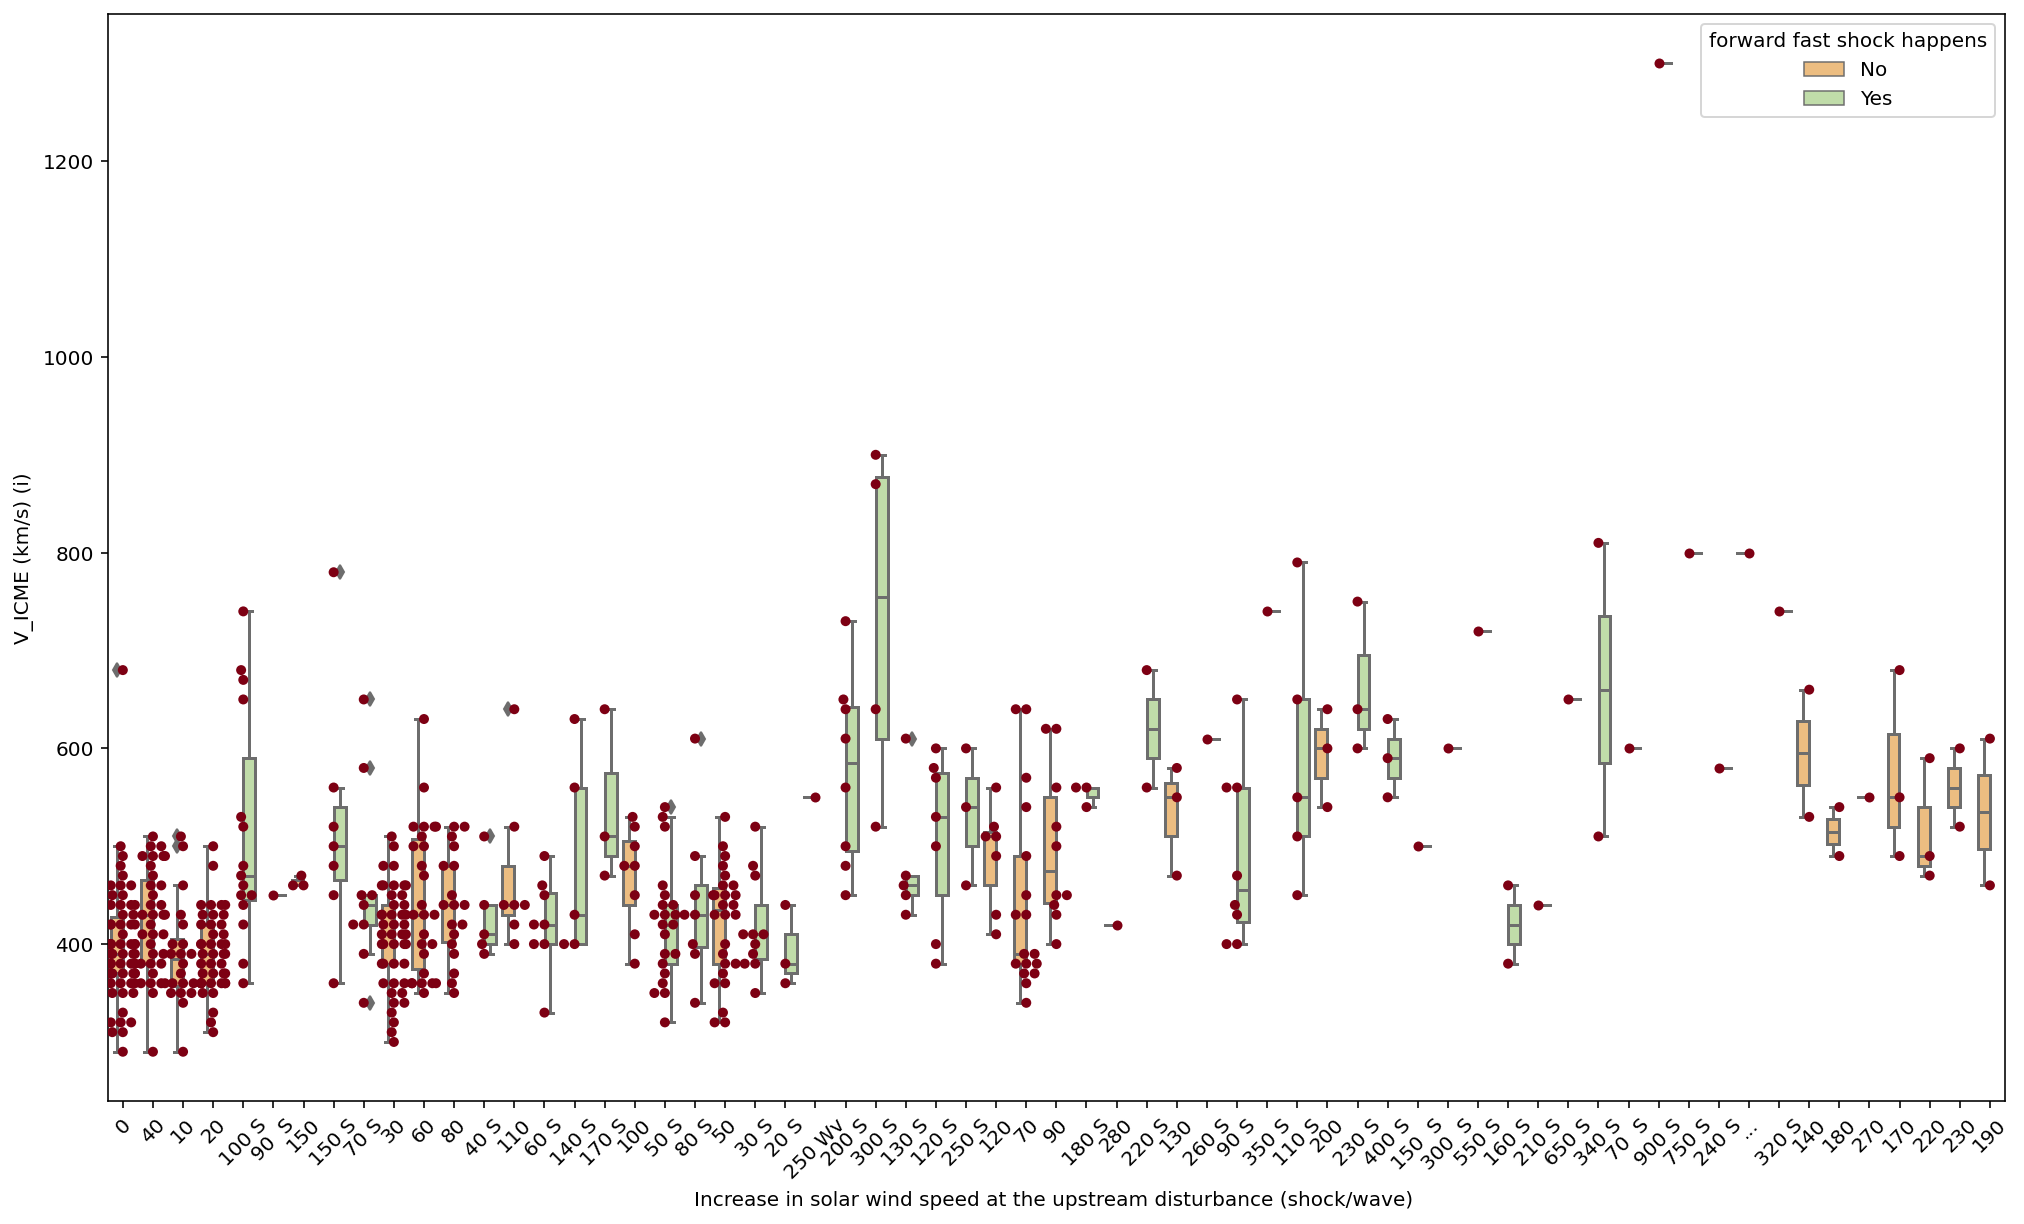

In [10]:
col1 = 'dV (km/s) (h)'
col2_numer = 'V_ICME (km/s) (i)'

# https://www.reneshbedre.com/blog/anova.html
plt.figure(figsize=(17,10))

ax = sns.boxplot(x=col1, y=col2_numer, data=df, palette="Spectral", 
                 hue=df['forward fast shock happens'])
ax.set_xticklabels(ax.get_xticklabels(),rotation = 45)

ax = sns.swarmplot(x=col1, y=col2_numer, data=df, color='#7d0013')
plt.xlabel('Increase in solar wind speed at the upstream disturbance (shock/wave) ')
plt.show()

In [11]:
df['MC? (l)'].unique()

array(['2', '2H', '0', '1'], dtype=object)

In [12]:
df['BIF? (f)'].unique()

array(['...', 'Y', 'N', '..'], dtype=object)

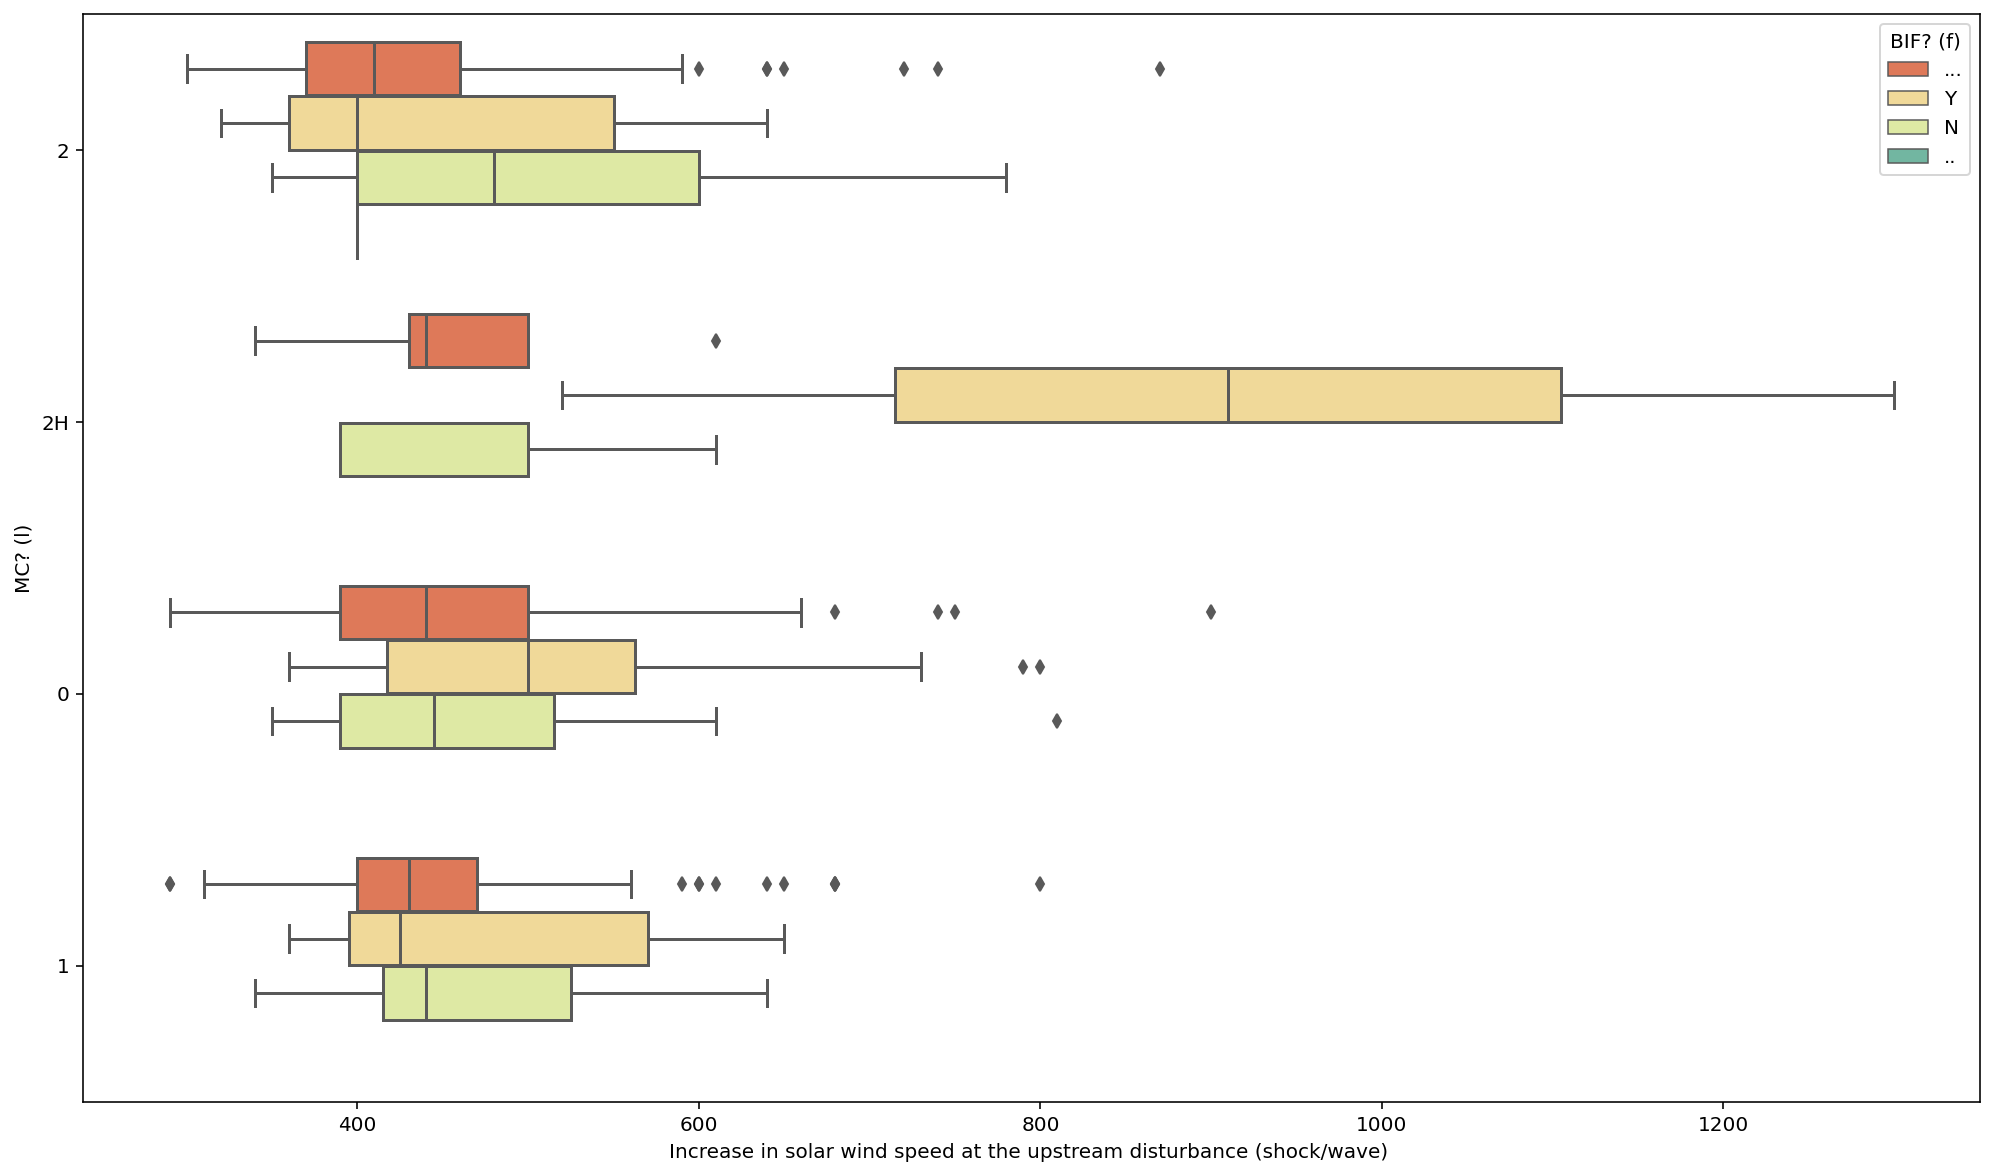

In [13]:
# https://www.reneshbedre.com/blog/anova.html
plt.figure(figsize=(17,10))

ax = sns.boxplot(y=df['MC? (l)'], 
                 x=df['V_ICME (km/s) (i)'], 
                 data=df, 
                 palette="Spectral", 
                 hue=df['BIF? (f)'])
# ax.set_xticklabels(ax.get_xticklabels(),rotation = 45)

# ax = sns.swarmplot(x=col1, y=col2_numer, data=df, color='#7d0013')
plt.xlabel('Increase in solar wind speed at the upstream disturbance (shock/wave) ')
plt.show()

In [14]:
df['B (nT) (k)'].unique()

array([ 9, 11,  7, 10, 14,  8, 20, 12, 21, 16, 17,  5,  6, 13, 18, 15,  4,
        3, 33, 22, 23, 19, 32, 28,  2])

In [15]:
# # https://www.reneshbedre.com/blog/anova.html
# plt.figure(figsize=(17,10))

# ax = sns.boxplot(y=df['MC? (l)'], 
#                  x=df['V_ICME (km/s) (i)'], 
#                  data=df, 
#                  palette="Spectral", 
#                  hue=df['B (nT) (k)'])
# # ax.set_xticklabels(ax.get_xticklabels(),rotation = 45)

# # ax = sns.swarmplot(x=col1, y=col2_numer, data=df, color='#7d0013')
# plt.xlabel('Increase in solar wind speed at the upstream disturbance (shock/wave) ')
# plt.show()

In [16]:
df['MC? (l)'].unique()

array(['2', '2H', '0', '1'], dtype=object)

In [17]:
df['Qual. (g)'].unique()

array(['2', '3', '1', '2W', '3W'], dtype=object)

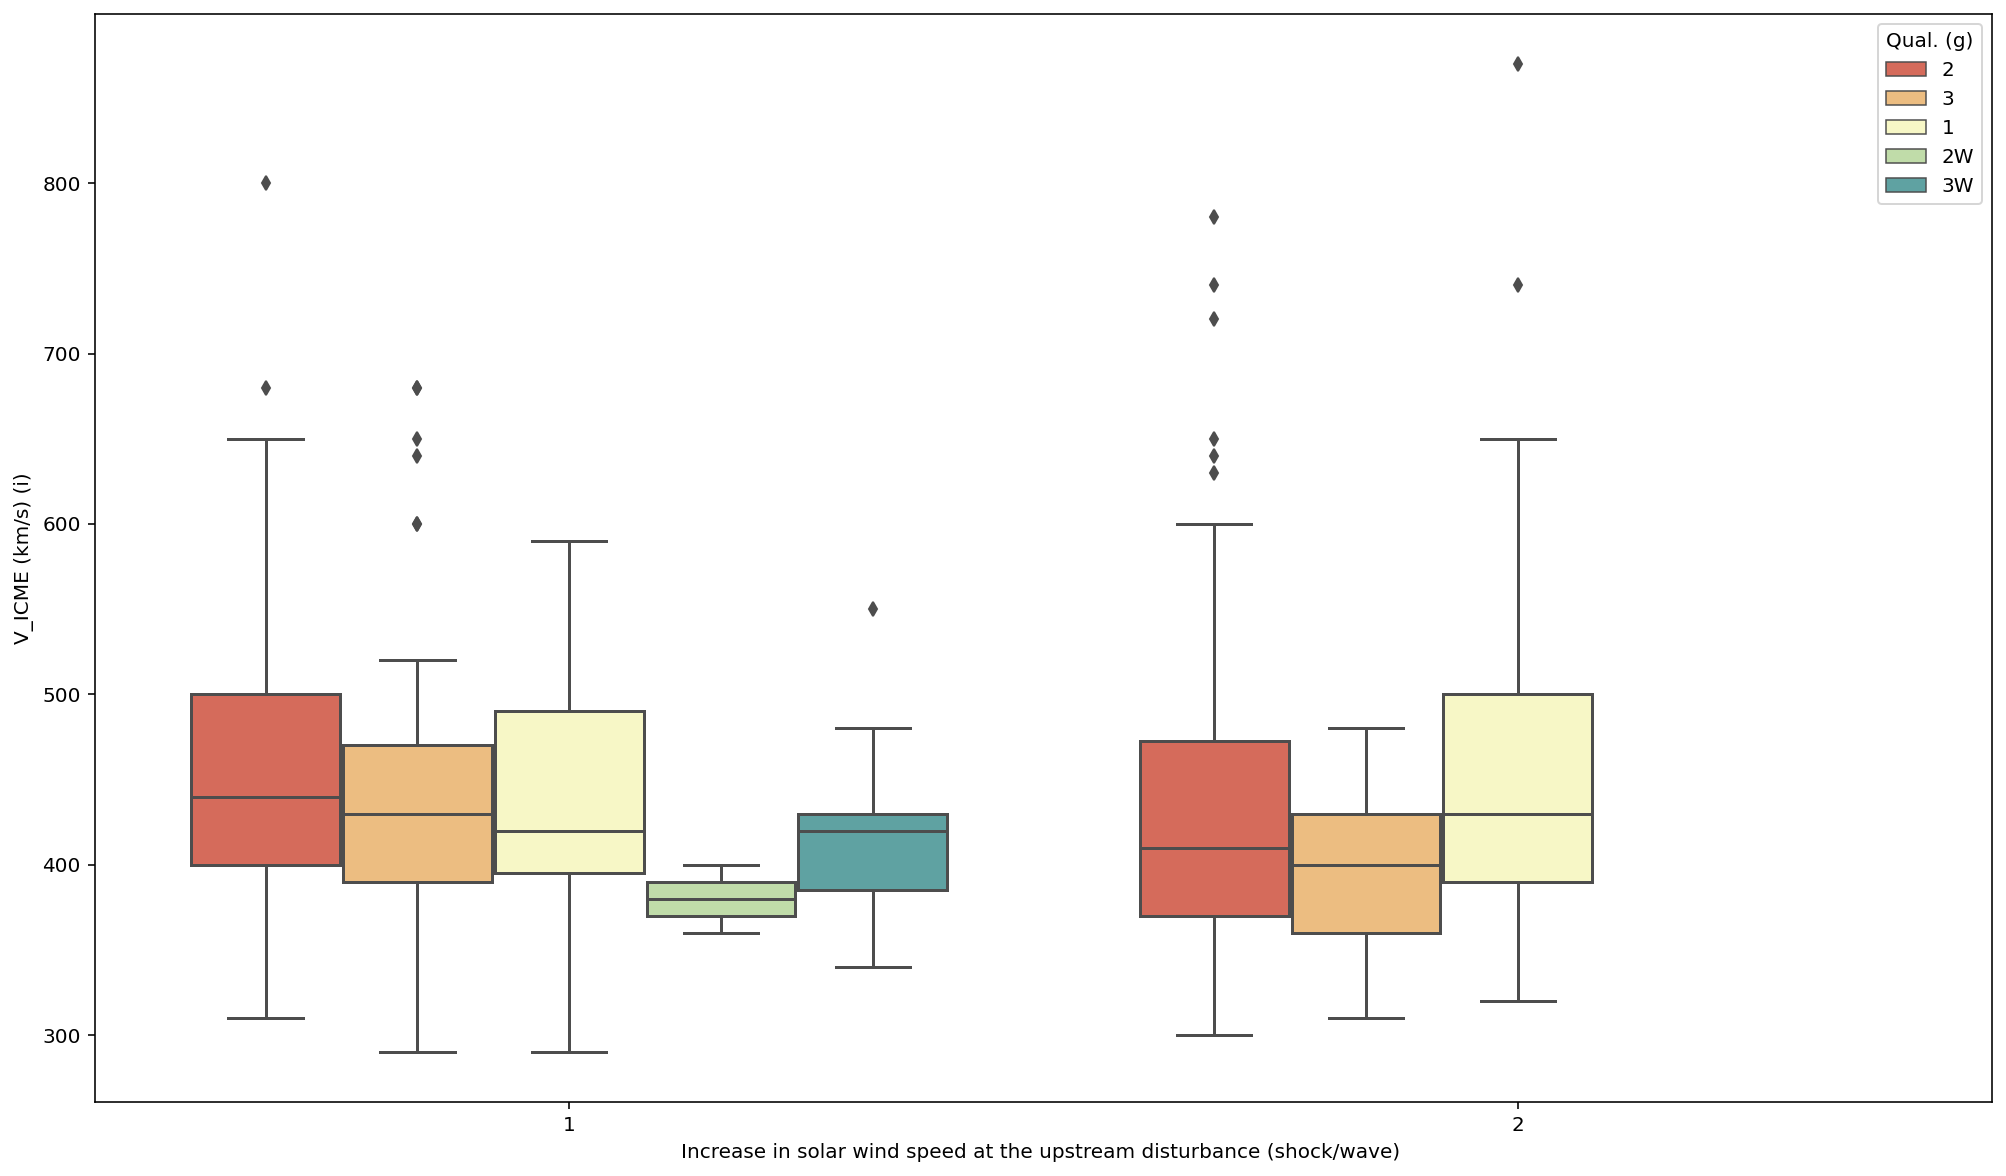

In [18]:
# https://www.reneshbedre.com/blog/anova.html
plt.figure(figsize=(17,10))

ax = sns.boxplot(x=df['MC? (l)'][(df['MC? (l)'] == '2') | (df['MC? (l)'] == '1')],
                 
                 y=df['V_ICME (km/s) (i)'], 
                 
                 data=df, 
                 
                 palette="Spectral", 
                 
                 hue=df['Qual. (g)'],
                 
#                  hue=df['Qual. (g)'][(df['Qual. (g)'] == '2') | (df['Qual. (g)'] == '1')],
                )
plt.xlabel('Increase in solar wind speed at the upstream disturbance (shock/wave) ')
plt.show()

In [19]:
df.head()

,Disturbance Y/M/D (UT) (a),Comp. Start (Hrs wrt. Plasma/ Field) (c),Comp. End (Hrs wrt. Plasma/ Field) (c),MC Start (Hrs wrt. Plasma/ Field) (d),End (Hrs wrt. Plasma/ Field) (d),BDE? (e),BIF? (f),Qual. (g),dV (km/s) (h),V_ICME (km/s) (i),V_max (km/s) (j),B (nT) (k),MC? (l),Dst (nT) (m),V_transit (km/s) (n),LASCO CME Y/M/D (UT) (o),forward fast shock happens
ICME Plasma/Field Start Y/M/D (UT) (b),,,,,,,,,,,,,,,,,
1996-05-27 15:00:00,1996/05/27 1500,...,...,0,+4,N,...,2,0,370,400,9,2,-33,...,NaN,No
1996-07-01 18:00:00,1996/07/01 1320,...,...,0,0,N,...,3,40,360,370,11,2,-20,...,NaN,No
1996-08-07 12:00:00,1996/08/07 0600,...,...,0,0,N,...,2,10,350,380,7,2,-23,...,NaN,No
1996-12-23 17:00:00,1996/12/23 1600,...,...,+10,0,N,...,2,20,360,420,10,2,-18,435,1996/12/19 1630 H,No
1997-01-10 04:00:00,1997/01/10 0104,...,...,0,0,Y,...,1,100 S,450,460,14,2,-78,507,1997/01/06 1510 H,Yes


In [20]:
df = df.drop(columns=['Comp. Start (Hrs wrt. Plasma/ Field) (c)'])
df = df.drop(columns=['Comp. End (Hrs wrt. Plasma/ Field) (c)'])

In [21]:
df = df.drop(columns=['Disturbance Y/M/D (UT) (a)'])

In [22]:
df.head()

,MC Start (Hrs wrt. Plasma/ Field) (d),End (Hrs wrt. Plasma/ Field) (d),BDE? (e),BIF? (f),Qual. (g),dV (km/s) (h),V_ICME (km/s) (i),V_max (km/s) (j),B (nT) (k),MC? (l),Dst (nT) (m),V_transit (km/s) (n),LASCO CME Y/M/D (UT) (o),forward fast shock happens
ICME Plasma/Field Start Y/M/D (UT) (b),,,,,,,,,,,,,,
1996-05-27 15:00:00,0,+4,N,...,2,0,370,400,9,2,-33,...,NaN,No
1996-07-01 18:00:00,0,0,N,...,3,40,360,370,11,2,-20,...,NaN,No
1996-08-07 12:00:00,0,0,N,...,2,10,350,380,7,2,-23,...,NaN,No
1996-12-23 17:00:00,+10,0,N,...,2,20,360,420,10,2,-18,435,1996/12/19 1630 H,No
1997-01-10 04:00:00,0,0,Y,...,1,100 S,450,460,14,2,-78,507,1997/01/06 1510 H,Yes


In [23]:
cols = ['MC Start (Hrs wrt. Plasma/ Field) (d)', 
        'End (Hrs wrt. Plasma/ Field) (d)']
df = df.drop(columns=cols)


In [24]:
df.head()

,BDE? (e),BIF? (f),Qual. (g),dV (km/s) (h),V_ICME (km/s) (i),V_max (km/s) (j),B (nT) (k),MC? (l),Dst (nT) (m),V_transit (km/s) (n),LASCO CME Y/M/D (UT) (o),forward fast shock happens
ICME Plasma/Field Start Y/M/D (UT) (b),,,,,,,,,,,,
1996-05-27 15:00:00,N,...,2,0,370,400,9,2,-33,...,NaN,No
1996-07-01 18:00:00,N,...,3,40,360,370,11,2,-20,...,NaN,No
1996-08-07 12:00:00,N,...,2,10,350,380,7,2,-23,...,NaN,No
1996-12-23 17:00:00,N,...,2,20,360,420,10,2,-18,435,1996/12/19 1630 H,No
1997-01-10 04:00:00,Y,...,1,100 S,450,460,14,2,-78,507,1997/01/06 1510 H,Yes


In [25]:
df = df.drop(columns=['BIF? (f)'])

In [26]:
df.head()

,BDE? (e),Qual. (g),dV (km/s) (h),V_ICME (km/s) (i),V_max (km/s) (j),B (nT) (k),MC? (l),Dst (nT) (m),V_transit (km/s) (n),LASCO CME Y/M/D (UT) (o),forward fast shock happens
ICME Plasma/Field Start Y/M/D (UT) (b),,,,,,,,,,,
1996-05-27 15:00:00,N,2,0,370,400,9,2,-33,...,NaN,No
1996-07-01 18:00:00,N,3,40,360,370,11,2,-20,...,NaN,No
1996-08-07 12:00:00,N,2,10,350,380,7,2,-23,...,NaN,No
1996-12-23 17:00:00,N,2,20,360,420,10,2,-18,435,1996/12/19 1630 H,No
1997-01-10 04:00:00,Y,1,100 S,450,460,14,2,-78,507,1997/01/06 1510 H,Yes


In [27]:
df = df.drop(columns=['LASCO CME Y/M/D (UT) (o)'])

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 513 entries, 1996-05-27 15:00:00 to 2021-05-26 22:00:00
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   BDE? (e)                    513 non-null    object
 1   Qual. (g)                   513 non-null    object
 2   dV (km/s) (h)               513 non-null    object
 3   V_ICME (km/s) (i)           513 non-null    int64 
 4   V_max (km/s) (j)            513 non-null    int64 
 5   B (nT) (k)                  513 non-null    int64 
 6   MC? (l)                     513 non-null    object
 7   Dst (nT) (m)                513 non-null    object
 8   V_transit (km/s) (n)        512 non-null    object
 9   forward fast shock happens  513 non-null    object
dtypes: int64(3), object(7)
memory usage: 44.1+ KB


In [29]:
df.head()

,BDE? (e),Qual. (g),dV (km/s) (h),V_ICME (km/s) (i),V_max (km/s) (j),B (nT) (k),MC? (l),Dst (nT) (m),V_transit (km/s) (n),forward fast shock happens
ICME Plasma/Field Start Y/M/D (UT) (b),,,,,,,,,,
1996-05-27 15:00:00,N,2,0,370,400,9,2,-33,...,No
1996-07-01 18:00:00,N,3,40,360,370,11,2,-20,...,No
1996-08-07 12:00:00,N,2,10,350,380,7,2,-23,...,No
1996-12-23 17:00:00,N,2,20,360,420,10,2,-18,435,No
1997-01-10 04:00:00,Y,1,100 S,450,460,14,2,-78,507,Yes


In [30]:
# magnetic cloud has been reported
df = df.rename(columns = {'MC? (l)':'magnetic cloud has been reported'})

In [31]:
df = df.drop(columns=['V_max (km/s) (j)'])

In [32]:
df.head()

,BDE? (e),Qual. (g),dV (km/s) (h),V_ICME (km/s) (i),B (nT) (k),magnetic cloud has been reported,Dst (nT) (m),V_transit (km/s) (n),forward fast shock happens
ICME Plasma/Field Start Y/M/D (UT) (b),,,,,,,,,
1996-05-27 15:00:00,N,2,0,370,9,2,-33,...,No
1996-07-01 18:00:00,N,3,40,360,11,2,-20,...,No
1996-08-07 12:00:00,N,2,10,350,7,2,-23,...,No
1996-12-23 17:00:00,N,2,20,360,10,2,-18,435,No
1997-01-10 04:00:00,Y,1,100 S,450,14,2,-78,507,Yes


In [33]:
# Evidence of BiDirectional suprathermal Electron strahls (BDE)
df = df.rename(columns = {'BDE? (e)':'Evidence of BiDirectional suprathermal Electron strahls (BDE)',
                         'Qual. (g)':'"quality" of the boundary times',
                         'dV (km/s) (h)':'Increase in solar wind speed at the upstream disturbance (shock/wave)',
                         'V_ICME (km/s) (i)':'solar wind speed km/s',
                         'B (nT) (k)':'Mean magnetic field strength in the ICME',
                         'Dst (nT) (m)':'minimum value of the geomagnetic',
                         'V_transit (km/s) (n)':'Mean 1 AU transit speed of the disturbance'})


In [34]:
df.head()

,Evidence of BiDirectional suprathermal Electron strahls (BDE),"""quality"" of the boundary times",Increase in solar wind speed at the upstream disturbance (shock/wave),solar wind speed km/s,Mean magnetic field strength in the ICME,magnetic cloud has been reported,minimum value of the geomagnetic,Mean 1 AU transit speed of the disturbance,forward fast shock happens
ICME Plasma/Field Start Y/M/D (UT) (b),,,,,,,,,
1996-05-27 15:00:00,N,2,0,370,9,2,-33,...,No
1996-07-01 18:00:00,N,3,40,360,11,2,-20,...,No
1996-08-07 12:00:00,N,2,10,350,7,2,-23,...,No
1996-12-23 17:00:00,N,2,20,360,10,2,-18,435,No
1997-01-10 04:00:00,Y,1,100 S,450,14,2,-78,507,Yes


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 513 entries, 1996-05-27 15:00:00 to 2021-05-26 22:00:00
Data columns (total 9 columns):
 #   Column                                                                 Non-Null Count  Dtype 
---  ------                                                                 --------------  ----- 
 0   Evidence of BiDirectional suprathermal Electron strahls (BDE)          513 non-null    object
 1   "quality" of the boundary times                                        513 non-null    object
 2   Increase in solar wind speed at the upstream disturbance (shock/wave)  513 non-null    object
 3   solar wind speed km/s                                                  513 non-null    int64 
 4   Mean magnetic field strength in the ICME                               513 non-null    int64 
 5   magnetic cloud has been reported                                       513 non-null    object
 6   minimum value of the geomagnetic                              

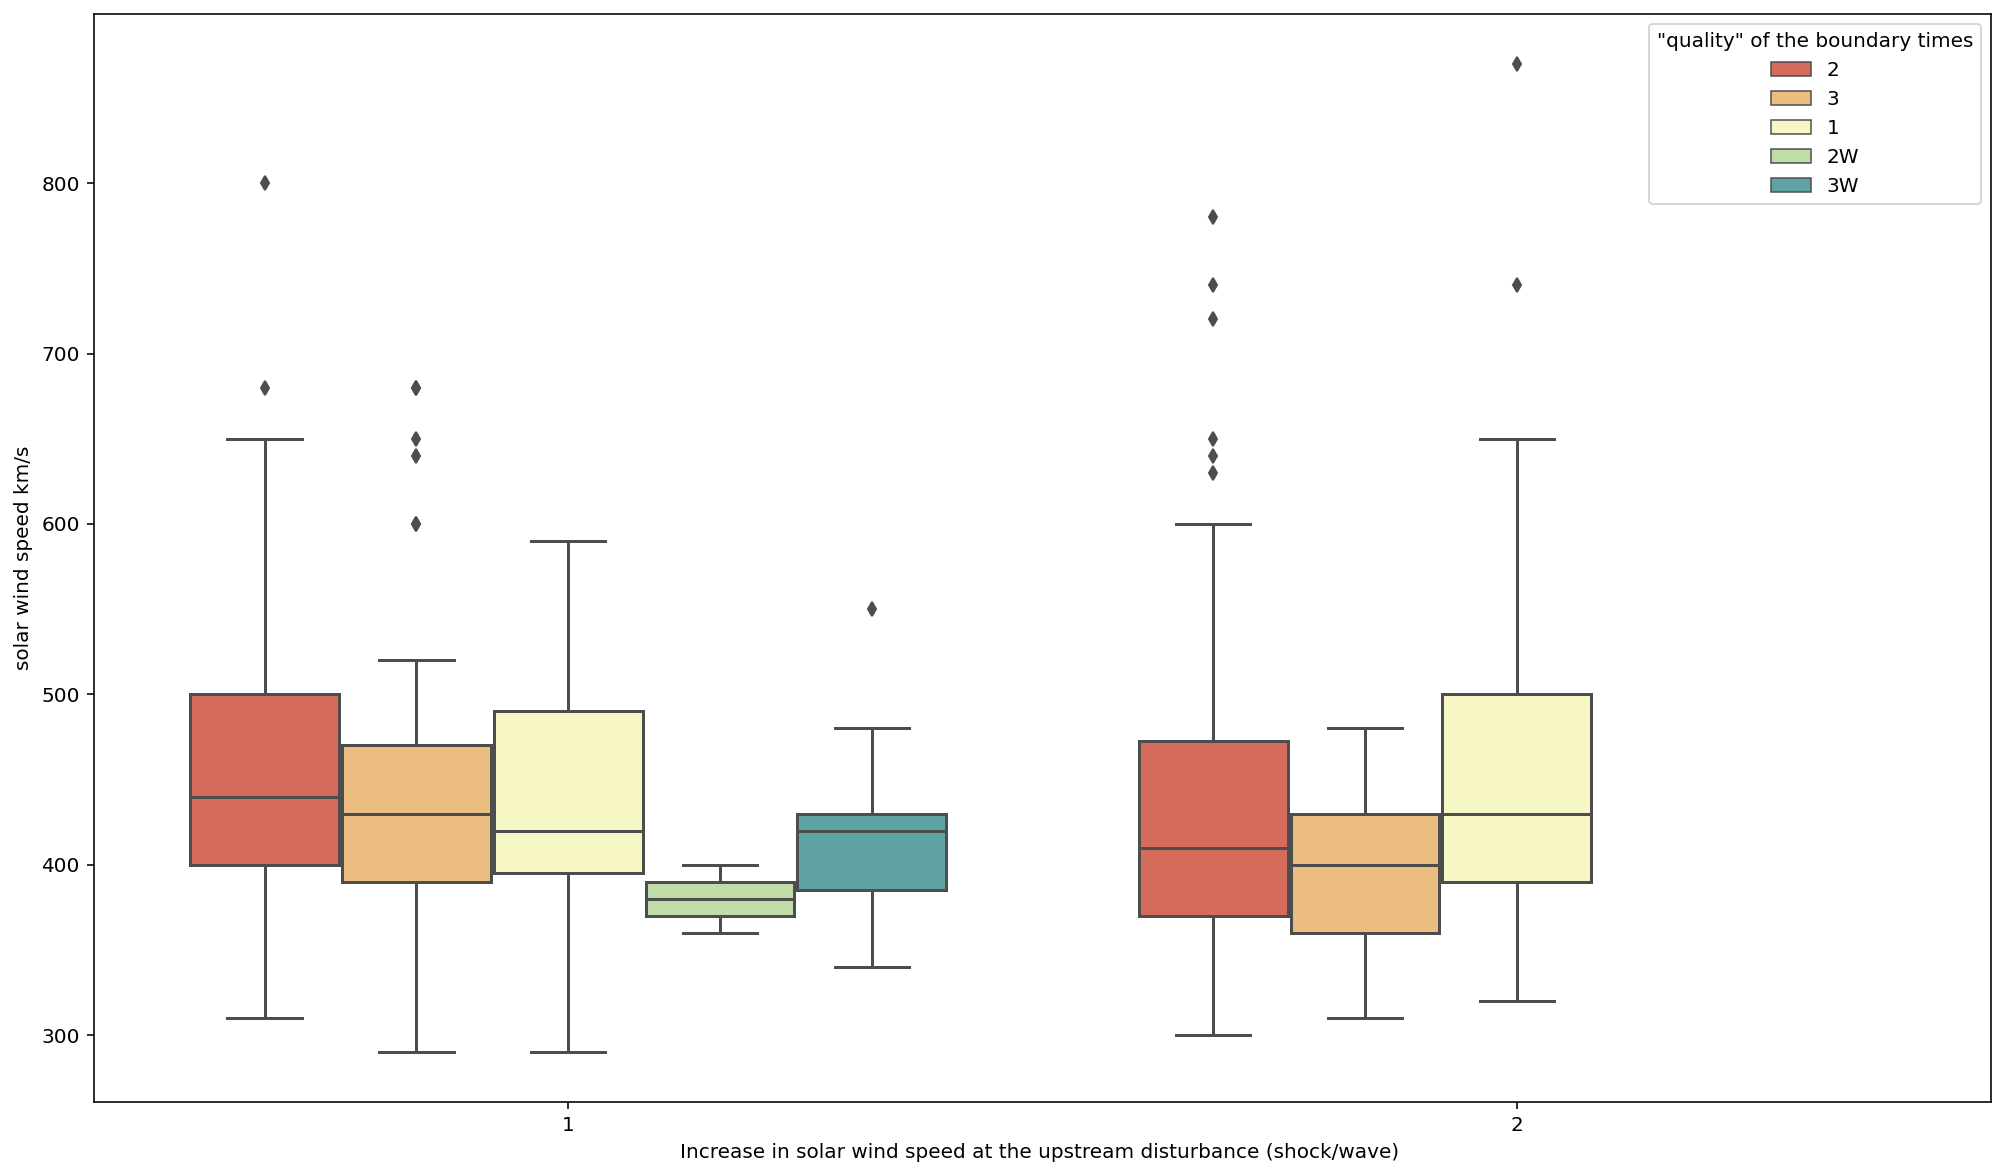

In [36]:
# https://www.reneshbedre.com/blog/anova.html
plt.figure(figsize=(17,10))

ax = sns.boxplot(x=df['magnetic cloud has been reported'][(df['magnetic cloud has been reported'] == '2') | (df['magnetic cloud has been reported'] == '1')],
                 
                 y=df['solar wind speed km/s'], 
                 
                 data=df, 
                 
                 palette="Spectral", 
                 
                 hue=df['"quality" of the boundary times'],                 
                )
plt.xlabel('Increase in solar wind speed at the upstream disturbance (shock/wave) ')
plt.show()

In [37]:
df['Evidence of BiDirectional suprathermal Electron strahls (BDE)'].unique()

array(['N', 'Y', '...', 'SEP'], dtype=object)

In [38]:
df.columns

Index(['Evidence of BiDirectional suprathermal Electron strahls (BDE)',
       '"quality" of the boundary times',
       'Increase in solar wind speed at the upstream disturbance (shock/wave)',
       'solar wind speed km/s', 'Mean magnetic field strength in the ICME',
       'magnetic cloud has been reported', 'minimum value of the geomagnetic',
       'Mean 1 AU transit speed of the disturbance',
       'forward fast shock happens'],
      dtype='object')

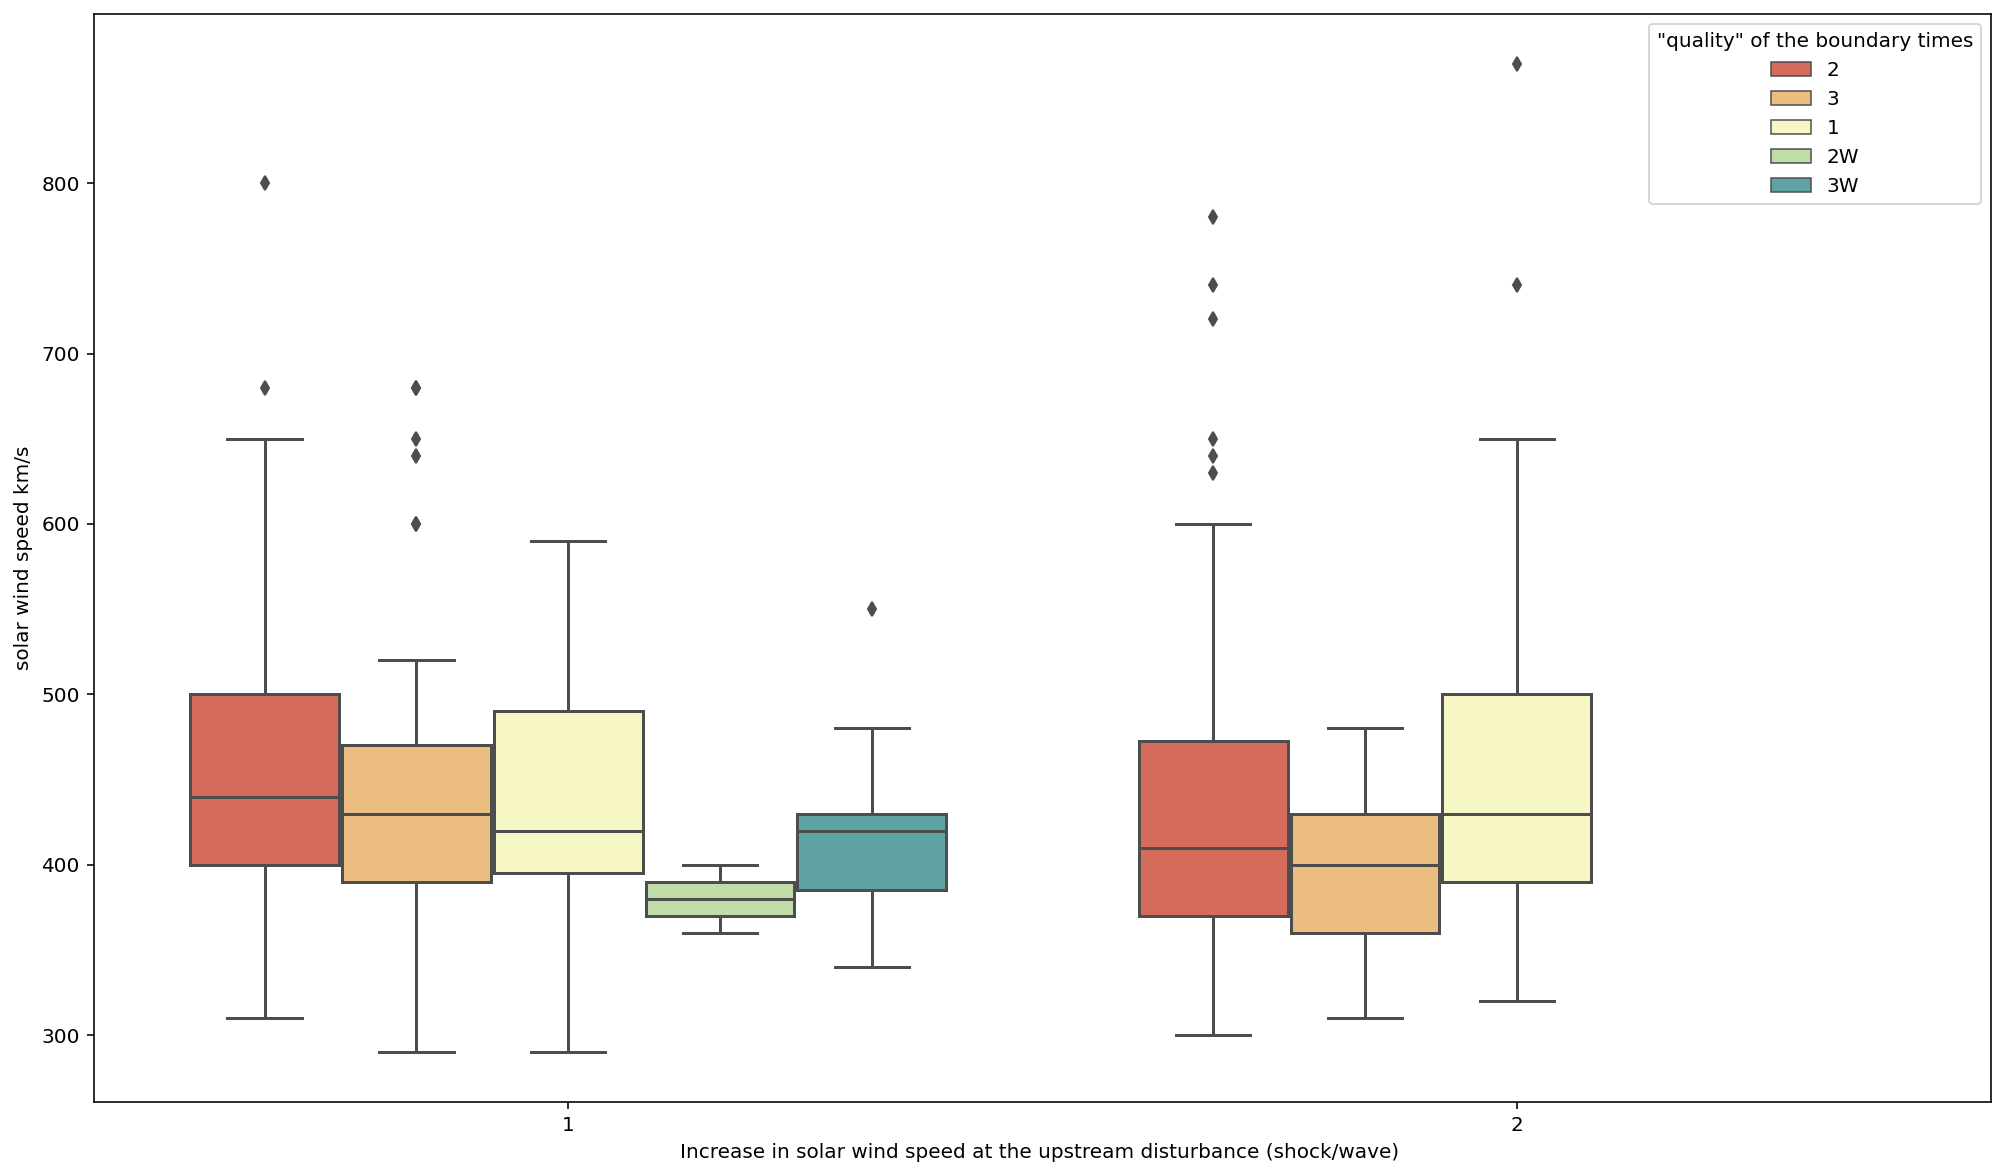

In [39]:
# https://www.reneshbedre.com/blog/anova.html
plt.figure(figsize=(17,10))

ax = sns.boxplot(x=df['magnetic cloud has been reported'][(df['magnetic cloud has been reported'] == '2') | (df['magnetic cloud has been reported'] == '1')],
                 y=df['solar wind speed km/s'], 
                 data=df, 
                 palette="Spectral", 
                 hue=df['"quality" of the boundary times'],
                )
plt.xlabel('Increase in solar wind speed at the upstream disturbance (shock/wave) ')
plt.show()

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 513 entries, 1996-05-27 15:00:00 to 2021-05-26 22:00:00
Data columns (total 9 columns):
 #   Column                                                                 Non-Null Count  Dtype 
---  ------                                                                 --------------  ----- 
 0   Evidence of BiDirectional suprathermal Electron strahls (BDE)          513 non-null    object
 1   "quality" of the boundary times                                        513 non-null    object
 2   Increase in solar wind speed at the upstream disturbance (shock/wave)  513 non-null    object
 3   solar wind speed km/s                                                  513 non-null    int64 
 4   Mean magnetic field strength in the ICME                               513 non-null    int64 
 5   magnetic cloud has been reported                                       513 non-null    object
 6   minimum value of the geomagnetic                              

## make new quality column as numeric

In [41]:
df['"quality" of the boundary times'].unique()

array(['2', '3', '1', '2W', '3W'], dtype=object)

In [42]:
cats_list = ['2', '3', '1', '2W', '3W']
replacement_list = [2,3,1,2.5,3.5]

#make new columns
df['"quality" of the boundary times*']=df['"quality" of the boundary times']

for cats, replacement in zip(cats_list, replacement_list):
    print(cats, replacement)
    df['"quality" of the boundary times*']=df['"quality" of the boundary times*'].replace(to_replace=cats,
                                                                                          value=replacement)

2 2
3 3
1 1
2W 2.5
3W 3.5


In [43]:
df['"quality" of the boundary times*'].unique()

array([2. , 3. , 1. , 2.5, 3.5])

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 513 entries, 1996-05-27 15:00:00 to 2021-05-26 22:00:00
Data columns (total 10 columns):
 #   Column                                                                 Non-Null Count  Dtype  
---  ------                                                                 --------------  -----  
 0   Evidence of BiDirectional suprathermal Electron strahls (BDE)          513 non-null    object 
 1   "quality" of the boundary times                                        513 non-null    object 
 2   Increase in solar wind speed at the upstream disturbance (shock/wave)  513 non-null    object 
 3   solar wind speed km/s                                                  513 non-null    int64  
 4   Mean magnetic field strength in the ICME                               513 non-null    int64  
 5   magnetic cloud has been reported                                       513 non-null    object 
 6   minimum value of the geomagnetic                     

## make new Evidence of BiDirectional suprathermal Electron strahls (BDE) column


Evidence of BiDirectional suprathermal Electron strahls (BDE) in ACE/SWEPAM Observations. If data are unavailable from SWEPAM (data commence on 10/22/97), observations from the 3-D P instrument on WIND are referred to. "SEP" indicates that an intense solar energetic particle event was in progress at the time of ICME passage and electron flows therefore cannot be determined.

In [45]:
df['Evidence of BiDirectional suprathermal Electron strahls (BDE)'].unique()

array(['N', 'Y', '...', 'SEP'], dtype=object)

In [46]:
cats_list = ['N', 'Y', '...', 'SEP']
replacement_list = ['no Evidence', 'some Evidence', 'nan',
                   'intense solar energetic particle event was in progress at the \
time of ICME passage and electron flows therefore cannot be determined']

#make new columns
df['Evidence of BiDirectional suprathermal Electron strahls (BDE)*']=\
df['Evidence of BiDirectional suprathermal Electron strahls (BDE)']

for cats, replacement in zip(cats_list, replacement_list):
    print(cats, replacement)
    df['Evidence of BiDirectional suprathermal Electron strahls (BDE)*']=\
    df['Evidence of BiDirectional suprathermal Electron strahls (BDE)*'].replace(to_replace=cats,
                                                                                value=replacement)

N no Evidence
Y some Evidence
... nan
SEP intense solar energetic particle event was in progress at the time of ICME passage and electron flows therefore cannot be determined


In [47]:
df.head()

,Evidence of BiDirectional suprathermal Electron strahls (BDE),"""quality"" of the boundary times",Increase in solar wind speed at the upstream disturbance (shock/wave),solar wind speed km/s,Mean magnetic field strength in the ICME,magnetic cloud has been reported,minimum value of the geomagnetic,Mean 1 AU transit speed of the disturbance,forward fast shock happens,"""quality"" of the boundary times*",Evidence of BiDirectional suprathermal Electron strahls (BDE)*
ICME Plasma/Field Start Y/M/D (UT) (b),,,,,,,,,,,
1996-05-27 15:00:00,N,2,0,370,9,2,-33,...,No,2.0,no Evidence
1996-07-01 18:00:00,N,3,40,360,11,2,-20,...,No,3.0,no Evidence
1996-08-07 12:00:00,N,2,10,350,7,2,-23,...,No,2.0,no Evidence
1996-12-23 17:00:00,N,2,20,360,10,2,-18,435,No,2.0,no Evidence
1997-01-10 04:00:00,Y,1,100 S,450,14,2,-78,507,Yes,1.0,some Evidence


# dv

Increase in solar wind speed at the upstream disturbance (shock/wave) estimated from 1 hour averaged solar wind data. 'S' indicates that a forward fast shock has been reported in the ACE List of Disturbances and Transients or Kasper Shock list (including ACE and WIND observations).

In [48]:
df['Increase in solar wind speed at the upstream disturbance (shock/wave)'].unique()

array(['0', '40', '10', '20', '100 S', '90  S', '150', '150 S', '70 S',
       '30', '60', '80', '40 S', '110', '60 S', '140 S', '170 S', '100',
       '50 S', '80 S', '50', '30 S', '20 S', '250 Wv', '200 S', '300 S',
       '130 S', '120 S', '250 S', '120', '70', '90', '180 S', '280',
       '220 S', '130', '260 S', '90 S', '350 S', '110 S', '200', '230 S',
       '400 S', '150  S', '300  S', '550 S', '160 S', '210 S', '650 S',
       '340 S', '70  S', '900 S', '750 S', '240 S', '...', '320 S', '140',
       '180', '270', '170', '220', '230', '190'], dtype=object)

In [49]:
cats_list = ['0', '40', '10', '20', '100 S', '90  S', '150', '150 S', '70 S',
       '30', '60', '80', '40 S', '110', '60 S', '140 S', '170 S', '100',
       '50 S', '80 S', '50', '30 S', '20 S', '250 Wv', '200 S', '300 S',
       '130 S', '120 S', '250 S', '120', '70', '90', '180 S', '280',
       '220 S', '130', '260 S', '90 S', '350 S', '110 S', '200', '230 S',
       '400 S', '150  S', '300  S', '550 S', '160 S', '210 S', '650 S',
       '340 S', '70  S', '900 S', '750 S', '240 S', '...', '320 S', '140',
       '180', '270', '170', '220', '230', '190']


replacement_list = [0, 40, 10, 20, 100, 90, 150, 150, 70,
       30, 60, 80, 40, 110, 60, 140, 170, 100,
       50, 80, 50, 30, 20, 250, 200, 300,
       130, 120, 250, 120, 70, 90, 180, 280,
       220, 130, 260, 90, 350, 110, 200, 230,
       400, 150, 300, 550, 160, 210, 650,
       340, 70, 900, 750, 240, 0, 320, 140,
       180, 270, 170, 220, 230, 190]

#make new columns
df['Increase in solar wind speed at the upstream disturbance (shock/wave)*']=\
df['Increase in solar wind speed at the upstream disturbance (shock/wave)']

for cats, replacement in zip(cats_list, replacement_list):
#     print(cats, replacement)
    df['Increase in solar wind speed at the upstream disturbance (shock/wave)*']=\
    df['Increase in solar wind speed at the upstream disturbance (shock/wave)*'].replace(to_replace=cats,
                                                                                value=replacement)

In [50]:
df.head()

,Evidence of BiDirectional suprathermal Electron strahls (BDE),"""quality"" of the boundary times",Increase in solar wind speed at the upstream disturbance (shock/wave),solar wind speed km/s,Mean magnetic field strength in the ICME,magnetic cloud has been reported,minimum value of the geomagnetic,Mean 1 AU transit speed of the disturbance,forward fast shock happens,"""quality"" of the boundary times*",Evidence of BiDirectional suprathermal Electron strahls (BDE)*,Increase in solar wind speed at the upstream disturbance (shock/wave)*
ICME Plasma/Field Start Y/M/D (UT) (b),,,,,,,,,,,,
1996-05-27 15:00:00,N,2,0,370,9,2,-33,...,No,2.0,no Evidence,0
1996-07-01 18:00:00,N,3,40,360,11,2,-20,...,No,3.0,no Evidence,40
1996-08-07 12:00:00,N,2,10,350,7,2,-23,...,No,2.0,no Evidence,10
1996-12-23 17:00:00,N,2,20,360,10,2,-18,435,No,2.0,no Evidence,20
1997-01-10 04:00:00,Y,1,100 S,450,14,2,-78,507,Yes,1.0,some Evidence,100


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 513 entries, 1996-05-27 15:00:00 to 2021-05-26 22:00:00
Data columns (total 12 columns):
 #   Column                                                                  Non-Null Count  Dtype  
---  ------                                                                  --------------  -----  
 0   Evidence of BiDirectional suprathermal Electron strahls (BDE)           513 non-null    object 
 1   "quality" of the boundary times                                         513 non-null    object 
 2   Increase in solar wind speed at the upstream disturbance (shock/wave)   513 non-null    object 
 3   solar wind speed km/s                                                   513 non-null    int64  
 4   Mean magnetic field strength in the ICME                                513 non-null    int64  
 5   magnetic cloud has been reported                                        513 non-null    object 
 6   minimum value of the geomagnetic             

# MC

'2' indicates that a magnetic cloud has been reported in association with the ICME (see (d) above) or (occasionally, or for recent events) that by our assessment, the ICME has the clear features of a magnetic cloud but a magnetic cloud may not have been reported. 'H' indicates an event reported by Huttunen et al. Ann Geophys. (2005) 23:1-17 that is not listed by Lepping. '1' indicates that the ICME shows evidence of a rotation in field direction, but lacks some other characteristics of a magnetic cloud, for example an enhanced magnetic field. '0' indicates that the ICME is not a reported magnetic cloud, and lacks most of the typical features of a magnetic cloud, such as a smoothly rotating, enhanced magnetic field.


magnetic cloud has been reported	

In [52]:
df['magnetic cloud has been reported'].unique()

array(['2', '2H', '0', '1'], dtype=object)

In [53]:
cats_list = ['2', '2H', '0', '1']
replacement_list = ['magnetic cloud has been reported', 
                    'magnetic cloud has been reported&\nevent reported by Huttunen et al. Ann Geophys', 
                    'magnetic cloud has not been reported', 
                    'evidence of a rotation in field direction, but lacks some other characteristics of a \
magnetic cloud']

#make new columns
df['magnetic cloud has been reported*']=\
df['magnetic cloud has been reported']

for cats, replacement in zip(cats_list, replacement_list):
    print(cats, replacement)
    df['magnetic cloud has been reported*']=\
    df['magnetic cloud has been reported*'].replace(to_replace=cats, value=replacement)

2 magnetic cloud has been reported
2H magnetic cloud has been reported&
event reported by Huttunen et al. Ann Geophys
0 magnetic cloud has not been reported
1 evidence of a rotation in field direction, but lacks some other characteristics of a magnetic cloud


In [54]:
df.head()

,Evidence of BiDirectional suprathermal Electron strahls (BDE),"""quality"" of the boundary times",Increase in solar wind speed at the upstream disturbance (shock/wave),solar wind speed km/s,Mean magnetic field strength in the ICME,magnetic cloud has been reported,minimum value of the geomagnetic,Mean 1 AU transit speed of the disturbance,forward fast shock happens,"""quality"" of the boundary times*",Evidence of BiDirectional suprathermal Electron strahls (BDE)*,Increase in solar wind speed at the upstream disturbance (shock/wave)*,magnetic cloud has been reported*
ICME Plasma/Field Start Y/M/D (UT) (b),,,,,,,,,,,,,
1996-05-27 15:00:00,N,2,0,370,9,2,-33,...,No,2.0,no Evidence,0,magnetic cloud has been reported
1996-07-01 18:00:00,N,3,40,360,11,2,-20,...,No,3.0,no Evidence,40,magnetic cloud has been reported
1996-08-07 12:00:00,N,2,10,350,7,2,-23,...,No,2.0,no Evidence,10,magnetic cloud has been reported
1996-12-23 17:00:00,N,2,20,360,10,2,-18,435,No,2.0,no Evidence,20,magnetic cloud has been reported
1997-01-10 04:00:00,Y,1,100 S,450,14,2,-78,507,Yes,1.0,some Evidence,100,magnetic cloud has been reported


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 513 entries, 1996-05-27 15:00:00 to 2021-05-26 22:00:00
Data columns (total 13 columns):
 #   Column                                                                  Non-Null Count  Dtype  
---  ------                                                                  --------------  -----  
 0   Evidence of BiDirectional suprathermal Electron strahls (BDE)           513 non-null    object 
 1   "quality" of the boundary times                                         513 non-null    object 
 2   Increase in solar wind speed at the upstream disturbance (shock/wave)   513 non-null    object 
 3   solar wind speed km/s                                                   513 non-null    int64  
 4   Mean magnetic field strength in the ICME                                513 non-null    int64  
 5   magnetic cloud has been reported                                        513 non-null    object 
 6   minimum value of the geomagnetic             

# DsTn


The minimum value of the geomagnetic Dst index during the period between the disturbance and ICME trailing edge (or slightly thereafter if storm peak is generated by the trailing regions of the ICME). 'P' indicates a "provisional" value, and 'Q' that real time ("quicklook") data from the WDC for Geomagnetism, Kyoto, are used. (Note that quicklook Dst values at the WDC are revised after they are initially posted, so the quoted values for recent ICMEs may be subject to revision.) Otherwise values are "final". See Zhang et al. [2007] for a discussion of the solar and interplanetary drivers of the intense (Dst ≤-100 nT) geomagnetic storms during 1996-2005.

minimum value of the geomagnetic

In [56]:
df['minimum value of the geomagnetic'].unique()

array(['-33', '-20', '-23', '-18', '-78', '-68', '-82', '-107', '-115',
       '-74', '-84', '-36', '-45', '-48', '-28', '-98', '-64', '-130',
       '-60', '-110', '-108', '-47', '-77', '-29', '-11', '-55', '-34',
       '-100', '-51', '-56', '-35', '-46', '-85', '-205', '-1', '-25',
       '-101', '-30', '-6', '-138', '-62', '-27', '-19', '-67', '-155',
       '-207', '-112', '-52', '-81', '-149', '-131', '-15', '-58', '-17',
       '-7', '-123', '-91', '-13', '-41', '-26', '-4', '-38', '-39',
       '-16', '-66', '-173', '-237', '-69', '-106', '-8', '-97', '-133',
       '-43', '-3', '-288', '-14', '-61', '-37', '-10', '-2', '-32',
       '-92', '-147', '-90', '-12', '-76', '0', '-57', '-301', '-93',
       '-42', '-71', '-235', '-201', '-143', '-182', '-127', '-159',
       '-80', '-119', '-73', '-87', '-387', '...', '-50', '-59', '-271',
       '-114', '-102', '-105', '-40', '-24', '-148', '-104', '-166',
       '-187', '-157', '-292', '-221', '-109', '-21', '-181', '-176',
      

In [59]:
df['minimum value of the geomagnetic*'] = df['minimum value of the geomagnetic']
    
for i, char in enumerate(df['minimum value of the geomagnetic']):
    try:
        
        df['minimum value of the geomagnetic*'][i] = int(char)
#         my_list.append(int(char))

    except:
#         my_list.append(0)
        df['minimum value of the geomagnetic*'][i] =0

In [60]:
df.head()

,Evidence of BiDirectional suprathermal Electron strahls (BDE),"""quality"" of the boundary times",Increase in solar wind speed at the upstream disturbance (shock/wave),solar wind speed km/s,Mean magnetic field strength in the ICME,magnetic cloud has been reported,minimum value of the geomagnetic,Mean 1 AU transit speed of the disturbance,forward fast shock happens,"""quality"" of the boundary times*",Evidence of BiDirectional suprathermal Electron strahls (BDE)*,Increase in solar wind speed at the upstream disturbance (shock/wave)*,magnetic cloud has been reported*,minimum value of the geomagnetic*
ICME Plasma/Field Start Y/M/D (UT) (b),,,,,,,,,,,,,,
1996-05-27 15:00:00,N,2,0,370,9,2,-33,...,No,2.0,no Evidence,0,magnetic cloud has been reported,-33
1996-07-01 18:00:00,N,3,40,360,11,2,-20,...,No,3.0,no Evidence,40,magnetic cloud has been reported,-20
1996-08-07 12:00:00,N,2,10,350,7,2,-23,...,No,2.0,no Evidence,10,magnetic cloud has been reported,-23
1996-12-23 17:00:00,N,2,20,360,10,2,-18,435,No,2.0,no Evidence,20,magnetic cloud has been reported,-18
1997-01-10 04:00:00,Y,1,100 S,450,14,2,-78,507,Yes,1.0,some Evidence,100,magnetic cloud has been reported,-78


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 513 entries, 1996-05-27 15:00:00 to 2021-05-26 22:00:00
Data columns (total 14 columns):
 #   Column                                                                  Non-Null Count  Dtype  
---  ------                                                                  --------------  -----  
 0   Evidence of BiDirectional suprathermal Electron strahls (BDE)           513 non-null    object 
 1   "quality" of the boundary times                                         513 non-null    object 
 2   Increase in solar wind speed at the upstream disturbance (shock/wave)   513 non-null    object 
 3   solar wind speed km/s                                                   513 non-null    int64  
 4   Mean magnetic field strength in the ICME                                513 non-null    int64  
 5   magnetic cloud has been reported                                        513 non-null    object 
 6   minimum value of the geomagnetic             

# Mean 1 AU transit speed 

of the disturbance based on the CME association in (o).

Mean 1 AU transit speed of the disturbance

In [63]:
df['Mean 1 AU transit speed of the disturbance'].unique()

array(['...', '435', '507', '683', '552', '616', '381', '410', '405',
       '450', '580', '430', '572', '640', '460', '480', '557', '602',
       '440', '780', '1150', 'dg', '1260', '1020', '510', '570', '740',
       '520', '870', '760', '620', '560', '710', '615', '770', '561',
       '530', '630', '915', '815', '860', '603', '500', '830', '650',
       '403', '1007', '609', '940', '1500', '490', '550', '418', '756',
       '590', '565', '660', '1200', '720', '380', '680', '610', '850',
       '690', '700', '1050', '1290', '990', '1040', '790', '715', '417',
       '694', '1250', '1320', '667', '625', '750', '863', '420', '1323',
       '955', '766', '880', '910', '820', '999', '1078', '1331', '2185',
       '2138', '886', '920', '890', '1302', '960', '1080', '1170', '1210',
       '1270', '488', '477', '840', '1423', '540', nan, '1180', '980',
       '437', '350', '400', '600', '360', '670', '1100', '1220', '370',
       '730', '560?', '470', '563', '800', '810', '330', '300', '550

In [64]:
df['Mean 1 AU transit speed of the disturbance*'] = df['Mean 1 AU transit speed of the disturbance']
    
for i, char in enumerate(df['Mean 1 AU transit speed of the disturbance']):
    try:
        
        df['Mean 1 AU transit speed of the disturbance*'][i] = int(char)
#         my_list.append(int(char))

    except:
#         my_list.append(0)
        df['Mean 1 AU transit speed of the disturbance*'][i] = 0

In [65]:
df.head()

,Evidence of BiDirectional suprathermal Electron strahls (BDE),"""quality"" of the boundary times",Increase in solar wind speed at the upstream disturbance (shock/wave),solar wind speed km/s,Mean magnetic field strength in the ICME,magnetic cloud has been reported,minimum value of the geomagnetic,Mean 1 AU transit speed of the disturbance,forward fast shock happens,"""quality"" of the boundary times*",Evidence of BiDirectional suprathermal Electron strahls (BDE)*,Increase in solar wind speed at the upstream disturbance (shock/wave)*,magnetic cloud has been reported*,minimum value of the geomagnetic*,Mean 1 AU transit speed of the disturbance*
ICME Plasma/Field Start Y/M/D (UT) (b),,,,,,,,,,,,,,,
1996-05-27 15:00:00,N,2,0,370,9,2,-33,...,No,2.0,no Evidence,0,magnetic cloud has been reported,-33,0
1996-07-01 18:00:00,N,3,40,360,11,2,-20,...,No,3.0,no Evidence,40,magnetic cloud has been reported,-20,0
1996-08-07 12:00:00,N,2,10,350,7,2,-23,...,No,2.0,no Evidence,10,magnetic cloud has been reported,-23,0
1996-12-23 17:00:00,N,2,20,360,10,2,-18,435,No,2.0,no Evidence,20,magnetic cloud has been reported,-18,435
1997-01-10 04:00:00,Y,1,100 S,450,14,2,-78,507,Yes,1.0,some Evidence,100,magnetic cloud has been reported,-78,507


In [66]:
df.columns

Index(['Evidence of BiDirectional suprathermal Electron strahls (BDE)',
       '"quality" of the boundary times',
       'Increase in solar wind speed at the upstream disturbance (shock/wave)',
       'solar wind speed km/s', 'Mean magnetic field strength in the ICME',
       'magnetic cloud has been reported', 'minimum value of the geomagnetic',
       'Mean 1 AU transit speed of the disturbance',
       'forward fast shock happens', '"quality" of the boundary times*',
       'Evidence of BiDirectional suprathermal Electron strahls (BDE)*',
       'Increase in solar wind speed at the upstream disturbance (shock/wave)*',
       'magnetic cloud has been reported*',
       'minimum value of the geomagnetic*',
       'Mean 1 AU transit speed of the disturbance*'],
      dtype='object')

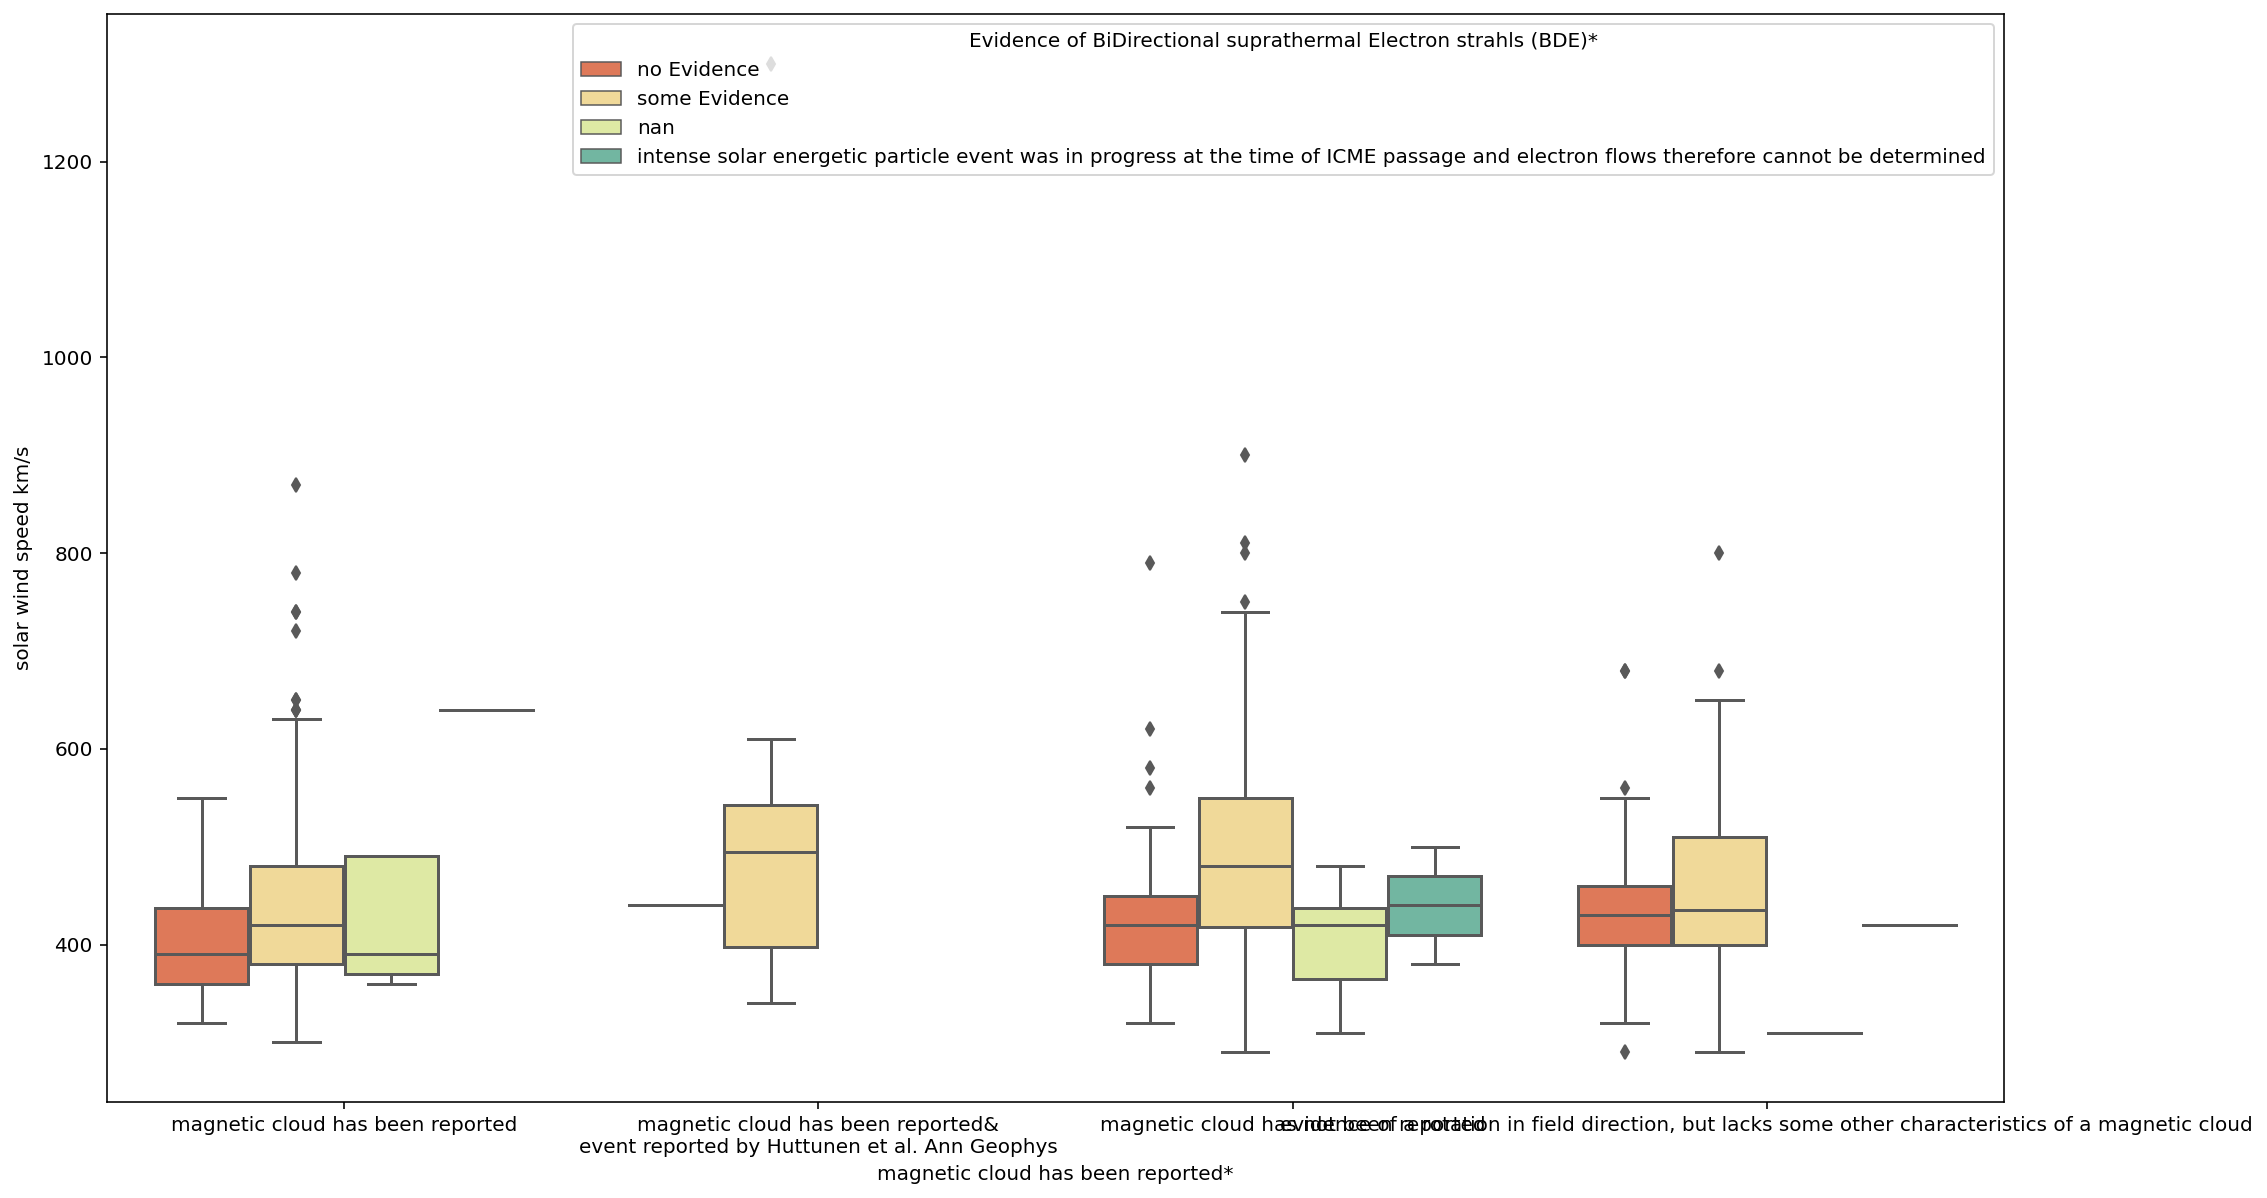

In [67]:
# https://www.reneshbedre.com/blog/anova.html
plt.figure(figsize=(17,10))

ax = sns.boxplot(x=df['magnetic cloud has been reported*'], 
                 y=df['solar wind speed km/s'], 
                 data=df, 
                 palette="Spectral", 
                 hue=df['Evidence of BiDirectional suprathermal Electron strahls (BDE)*'])
# ax.set_xticklabels(ax.get_xticklabels(),rotation = 45)

# ax = sns.swarmplot(x=col1, y=col2_numer, data=df, color='#7d0013')
# plt.xlabel('Increase in solar wind speed at the upstream disturbance (shock/wave) ')
plt.show()

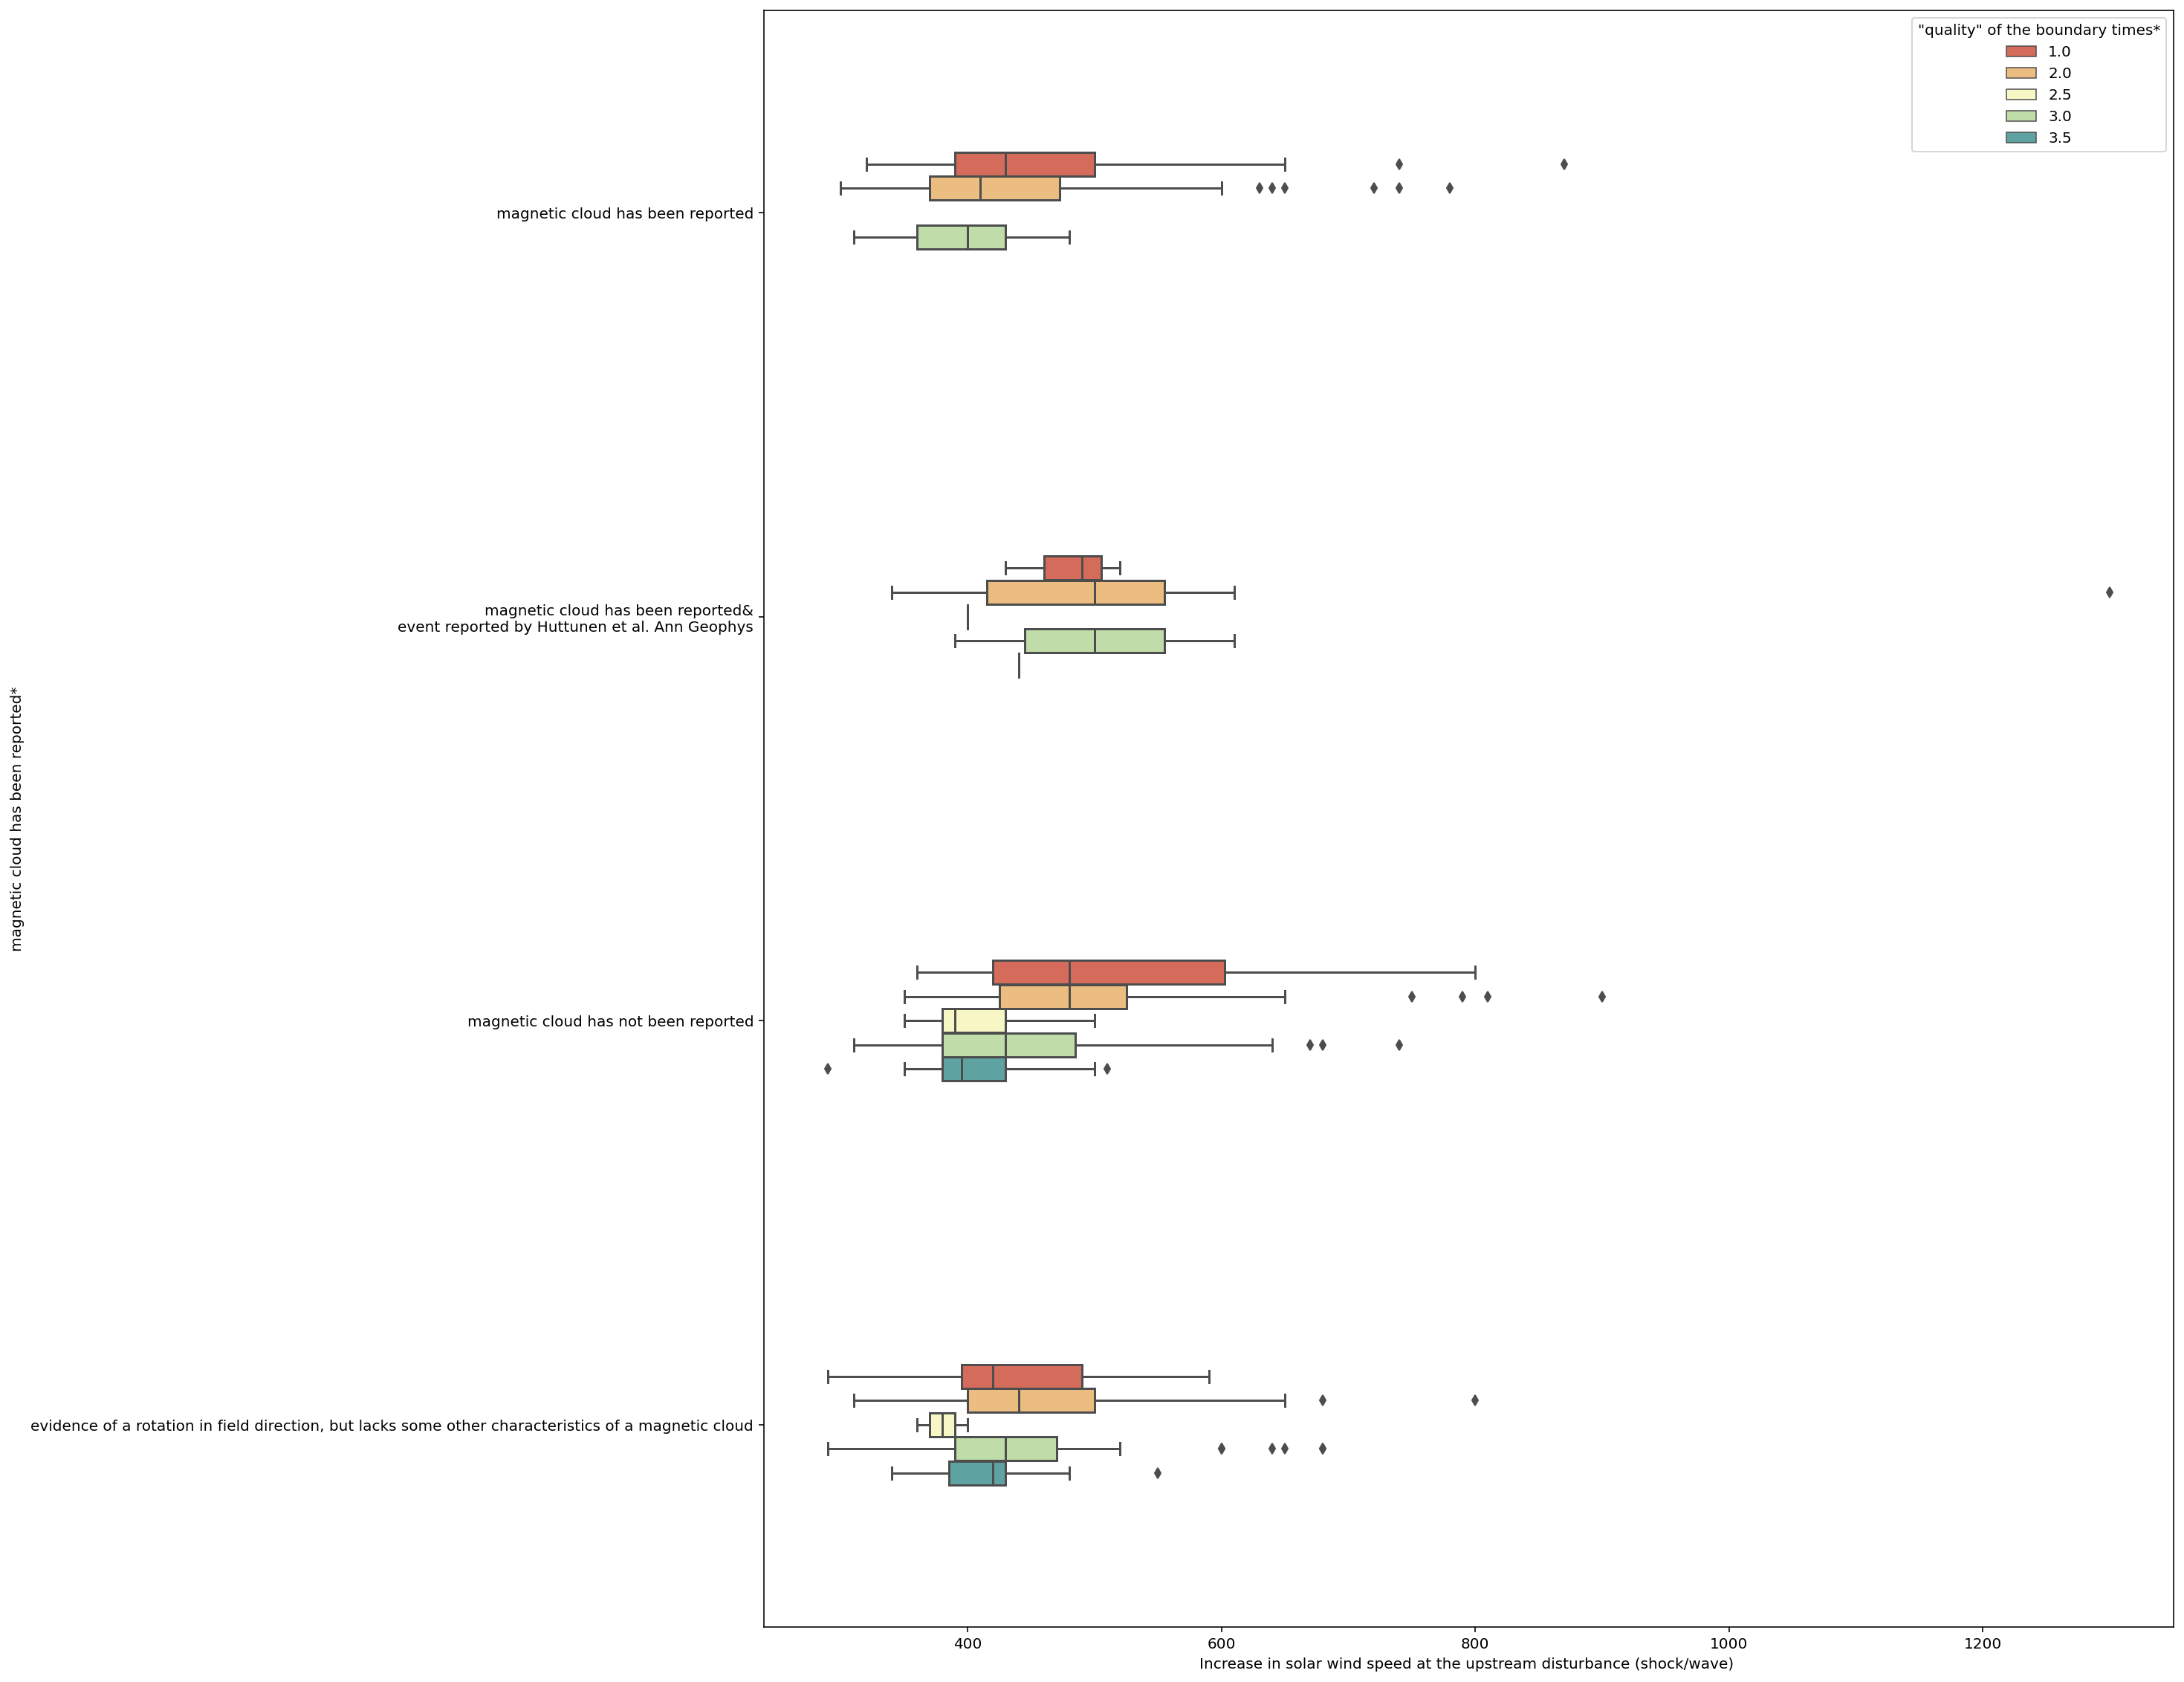

In [68]:
# https://www.reneshbedre.com/blog/anova.html
plt.figure(figsize=(17,20))

ax = sns.boxplot(y=df['magnetic cloud has been reported*'],
                 
                 x=df['solar wind speed km/s'], 
                 
                 data=df, 
#                  whis=1.5,
                 width=0.3,
                 palette="Spectral", 
                 
                 hue=df['"quality" of the boundary times*'],                 
                )
plt.xlabel('Increase in solar wind speed at the upstream disturbance (shock/wave) ')
plt.show()

In [69]:
df.head()

,Evidence of BiDirectional suprathermal Electron strahls (BDE),"""quality"" of the boundary times",Increase in solar wind speed at the upstream disturbance (shock/wave),solar wind speed km/s,Mean magnetic field strength in the ICME,magnetic cloud has been reported,minimum value of the geomagnetic,Mean 1 AU transit speed of the disturbance,forward fast shock happens,"""quality"" of the boundary times*",Evidence of BiDirectional suprathermal Electron strahls (BDE)*,Increase in solar wind speed at the upstream disturbance (shock/wave)*,magnetic cloud has been reported*,minimum value of the geomagnetic*,Mean 1 AU transit speed of the disturbance*
ICME Plasma/Field Start Y/M/D (UT) (b),,,,,,,,,,,,,,,
1996-05-27 15:00:00,N,2,0,370,9,2,-33,...,No,2.0,no Evidence,0,magnetic cloud has been reported,-33,0
1996-07-01 18:00:00,N,3,40,360,11,2,-20,...,No,3.0,no Evidence,40,magnetic cloud has been reported,-20,0
1996-08-07 12:00:00,N,2,10,350,7,2,-23,...,No,2.0,no Evidence,10,magnetic cloud has been reported,-23,0
1996-12-23 17:00:00,N,2,20,360,10,2,-18,435,No,2.0,no Evidence,20,magnetic cloud has been reported,-18,435
1997-01-10 04:00:00,Y,1,100 S,450,14,2,-78,507,Yes,1.0,some Evidence,100,magnetic cloud has been reported,-78,507


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 513 entries, 1996-05-27 15:00:00 to 2021-05-26 22:00:00
Data columns (total 15 columns):
 #   Column                                                                  Non-Null Count  Dtype  
---  ------                                                                  --------------  -----  
 0   Evidence of BiDirectional suprathermal Electron strahls (BDE)           513 non-null    object 
 1   "quality" of the boundary times                                         513 non-null    object 
 2   Increase in solar wind speed at the upstream disturbance (shock/wave)   513 non-null    object 
 3   solar wind speed km/s                                                   513 non-null    int64  
 4   Mean magnetic field strength in the ICME                                513 non-null    int64  
 5   magnetic cloud has been reported                                        513 non-null    object 
 6   minimum value of the geomagnetic             

In [74]:
df['Mean 1 AU transit speed of the disturbance*'] = df['Mean 1 AU transit speed of the disturbance*'].astype('int64')

In [77]:
df['minimum value of the geomagnetic*'] = df['minimum value of the geomagnetic*'].astype('int64')

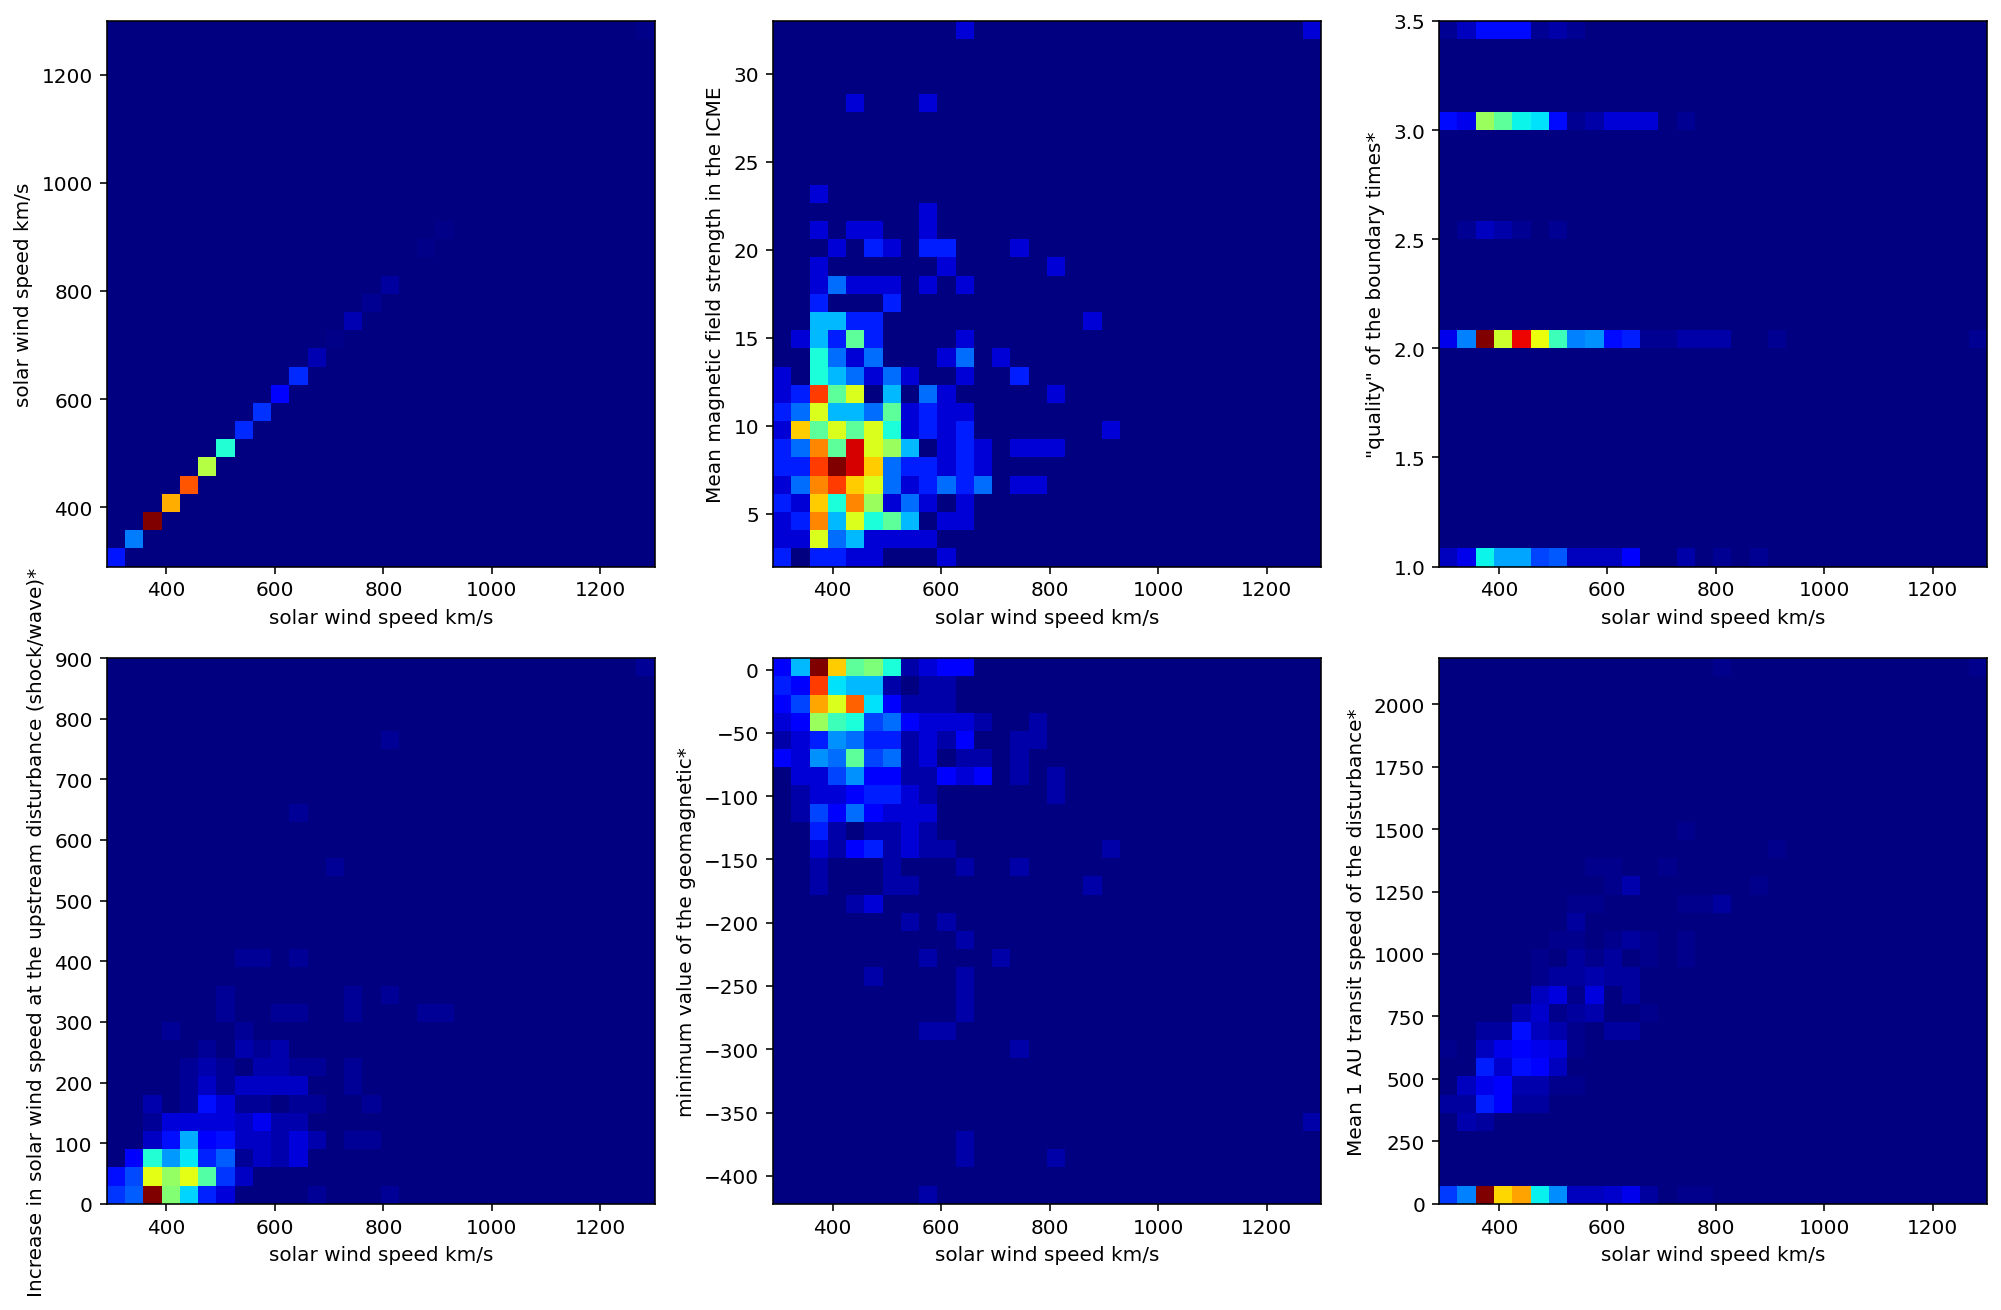

In [88]:
col1 = ['solar wind speed km/s', 
        'Mean magnetic field strength in the ICME',
        '"quality" of the boundary times*',
        'Increase in solar wind speed at the upstream disturbance (shock/wave)*',
        'minimum value of the geomagnetic*',
        'Mean 1 AU transit speed of the disturbance*']





plt.figure(figsize=(14,9))
for i, col in enumerate(col1):

    plt.subplot(2,3,i+1)

    plt.hist2d(df['solar wind speed km/s'], 
               df[col], 
               cmap=plt.cm.jet, 
               bins=(30, 30))
    plt.xlabel('solar wind speed km/s')
    plt.ylabel(col1[i])
plt.tight_layout()
plt.savefig('../Figures/P02_stat_EDA.png')
plt.show()